<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectif" data-toc-modified-id="Objectif-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectif</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Import-data-et-Prise-en-Main-Dataset" data-toc-modified-id="Import-data-et-Prise-en-Main-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data et Prise en Main Dataset</a></span></li><li><span><a href="#Manipulation-de-data" data-toc-modified-id="Manipulation-de-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manipulation de data</a></span></li><li><span><a href="#Créer-Target" data-toc-modified-id="Créer-Target-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Créer Target</a></span></li><li><span><a href="#Split-le-data-set" data-toc-modified-id="Split-le-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Split le data set</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Préparation-de-données-pour-le-MLP" data-toc-modified-id="Préparation-de-données-pour-le-MLP-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Préparation de données pour le MLP</a></span></li><li><span><a href="#Création-de-Model" data-toc-modified-id="Création-de-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Création de Model</a></span></li><li><span><a href="#Prédire" data-toc-modified-id="Prédire-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Prédire</a></span></li><li><span><a href="#Rescale" data-toc-modified-id="Rescale-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Rescale</a></span></li><li><span><a href="#Calculer-l'erreur" data-toc-modified-id="Calculer-l'erreur-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Calculer l'erreur</a></span></li><li><span><a href="#Calculer-gain" data-toc-modified-id="Calculer-gain-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Calculer gain</a></span></li></ul></div>

## Objectif

- Familiariser avec un nouveau data set
- Utiliser plus qu'une seule série temporelle
- Créer de nouvelles données à partir de celle déjà disponible
==> correction publié à la fin du cours

## Import
https://www.kaggle.com/datasets/psycon/bitcoin-usdt-2017202204-historical-dataset

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns; sns.set_theme()
import numpy as np
from scipy import stats
import random
from collections import deque 
import os
import tensorflow as tf
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (20,10)
import warnings
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")

## Import data et Prise en Main Dataset
- (1) Importez les donées en utilisant **pd.read_csv**
- (2) Explorer les données + plot

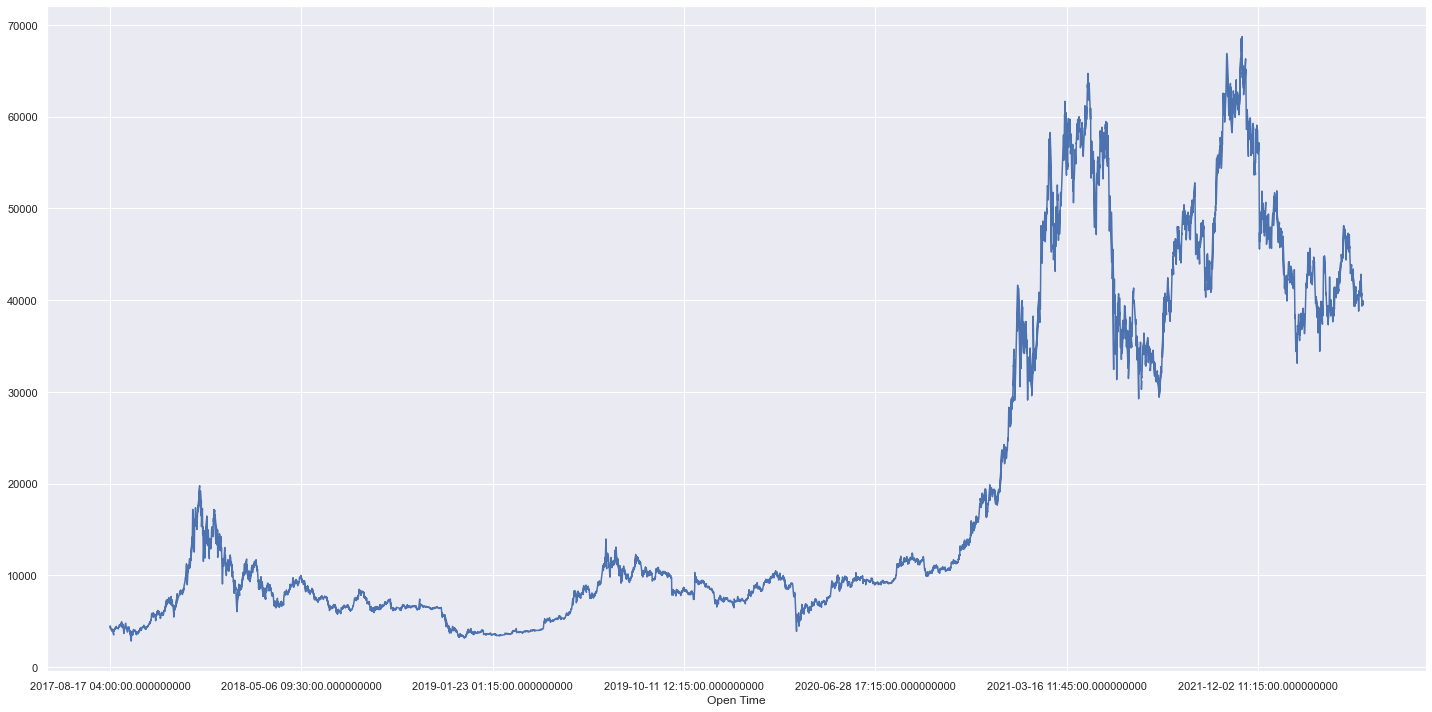

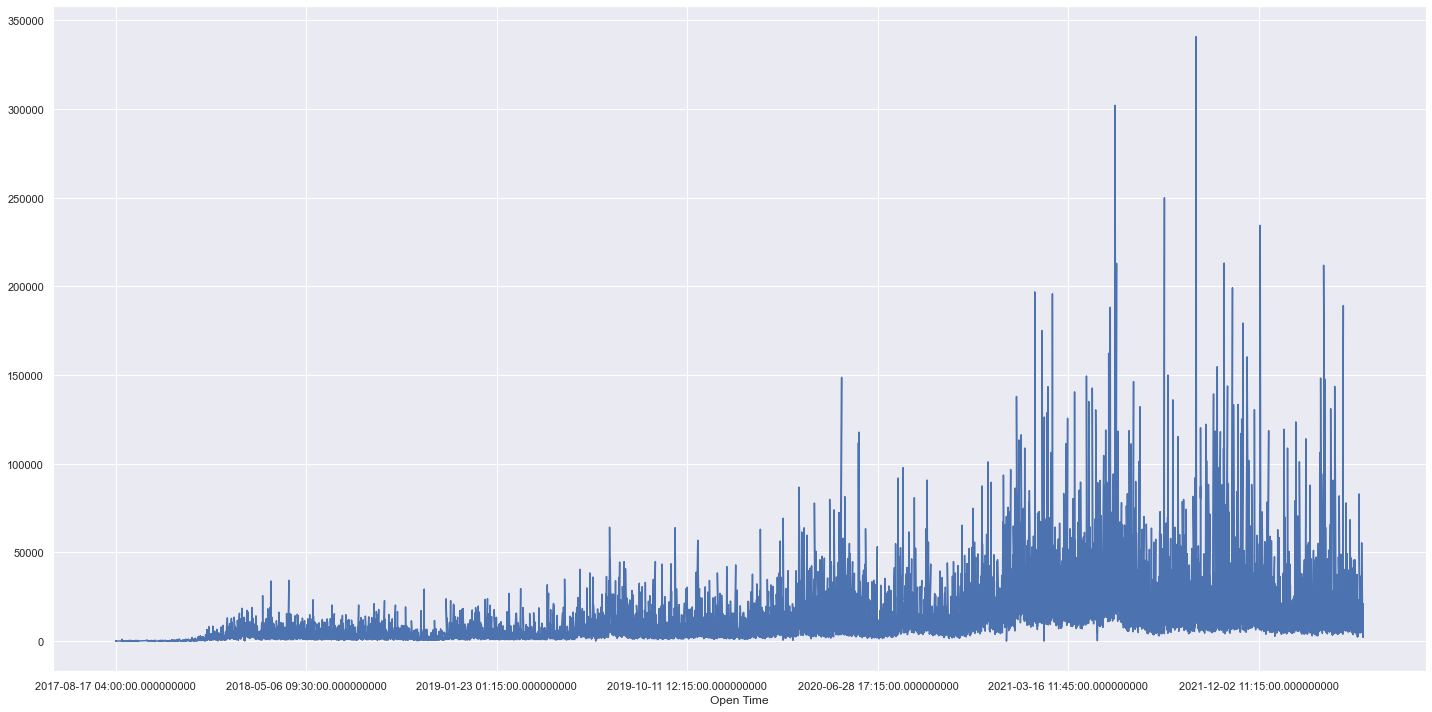

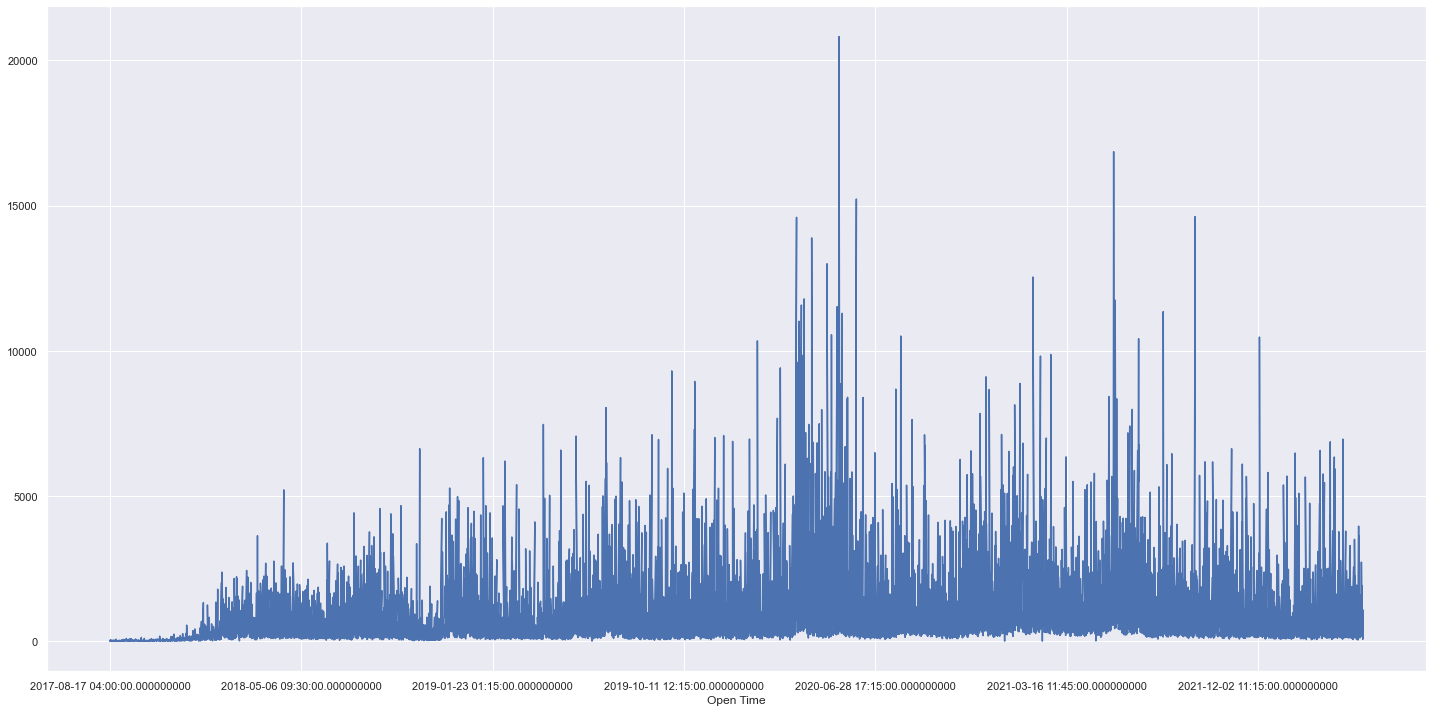

In [136]:
directory = "/Users/mc/Documents/Cours/btc-usdt.csv"

## Import
df = pd.read_csv(directory).set_index("Open Time")

## Plot
df['Open'].plot()
plt.show()
df['Number of Trades'].plot()
plt.show()
df['Volume'].plot()
plt.show()

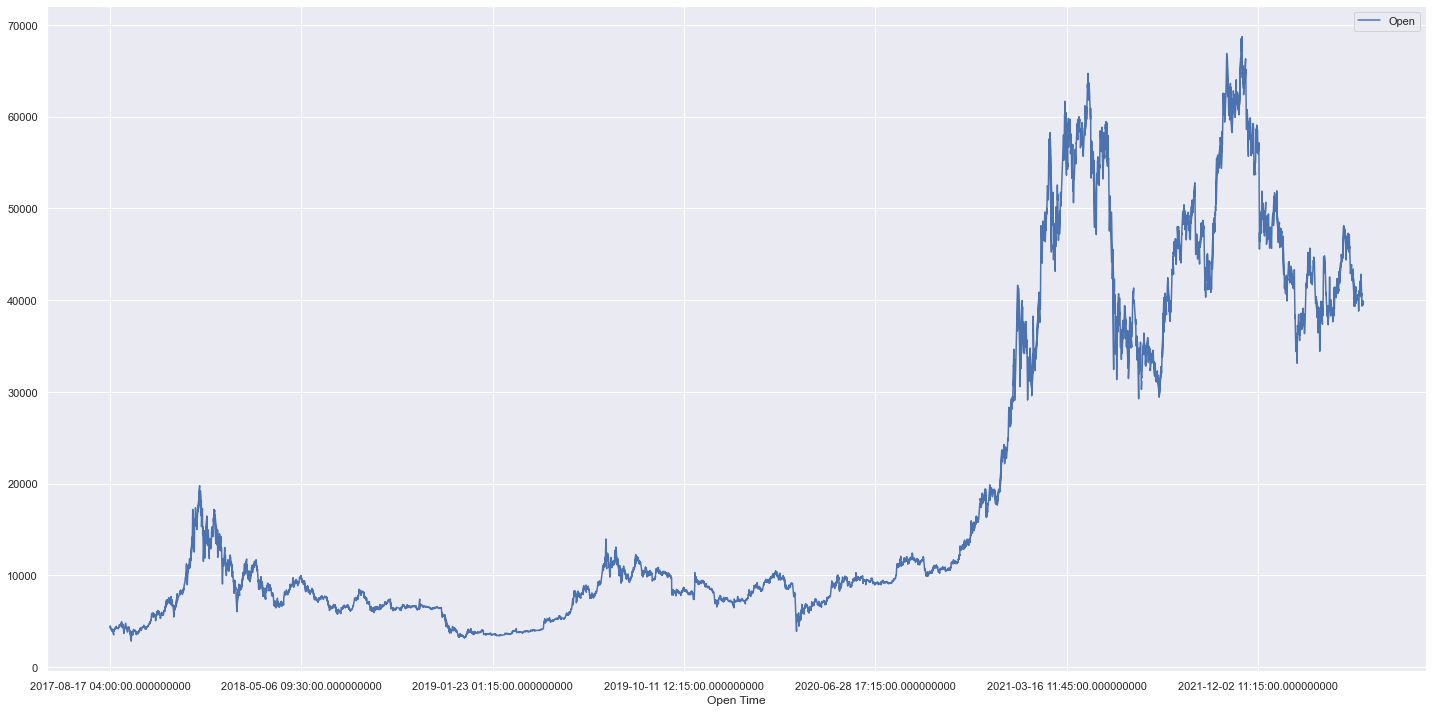

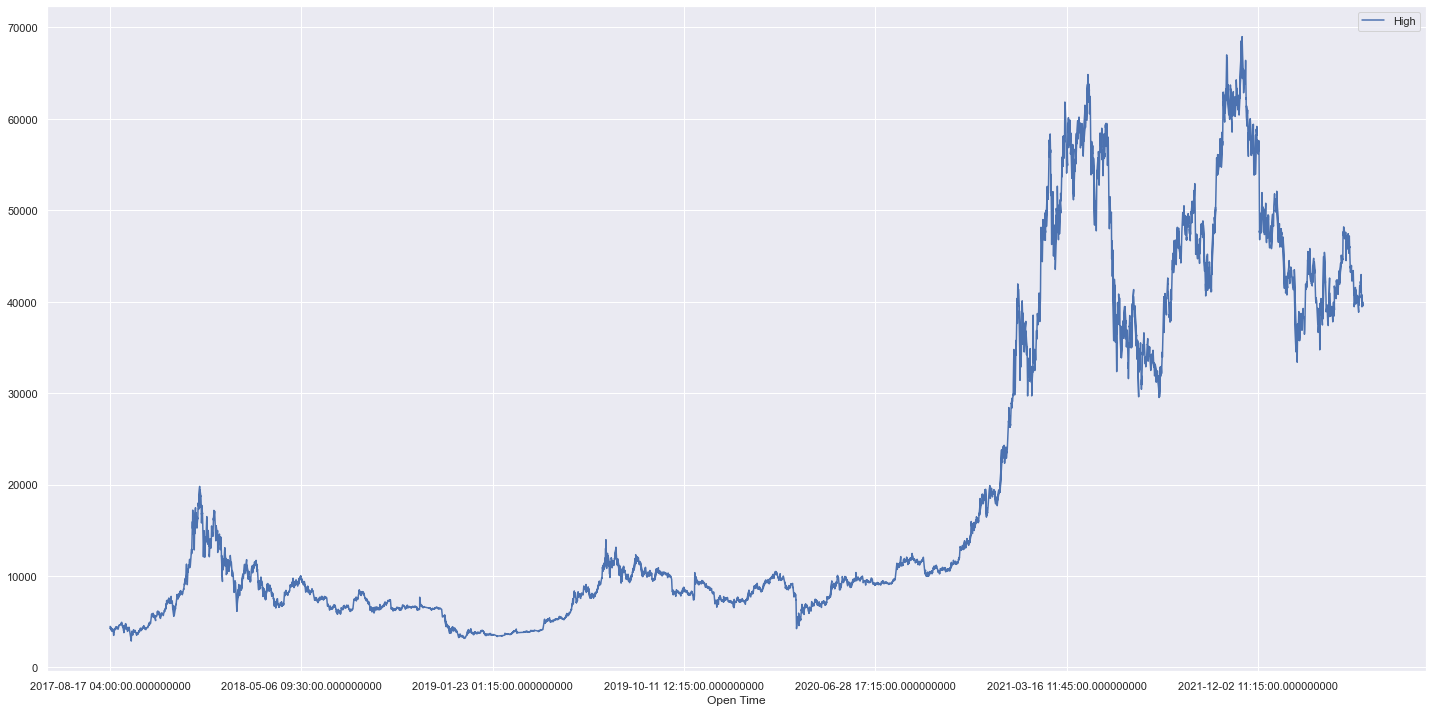

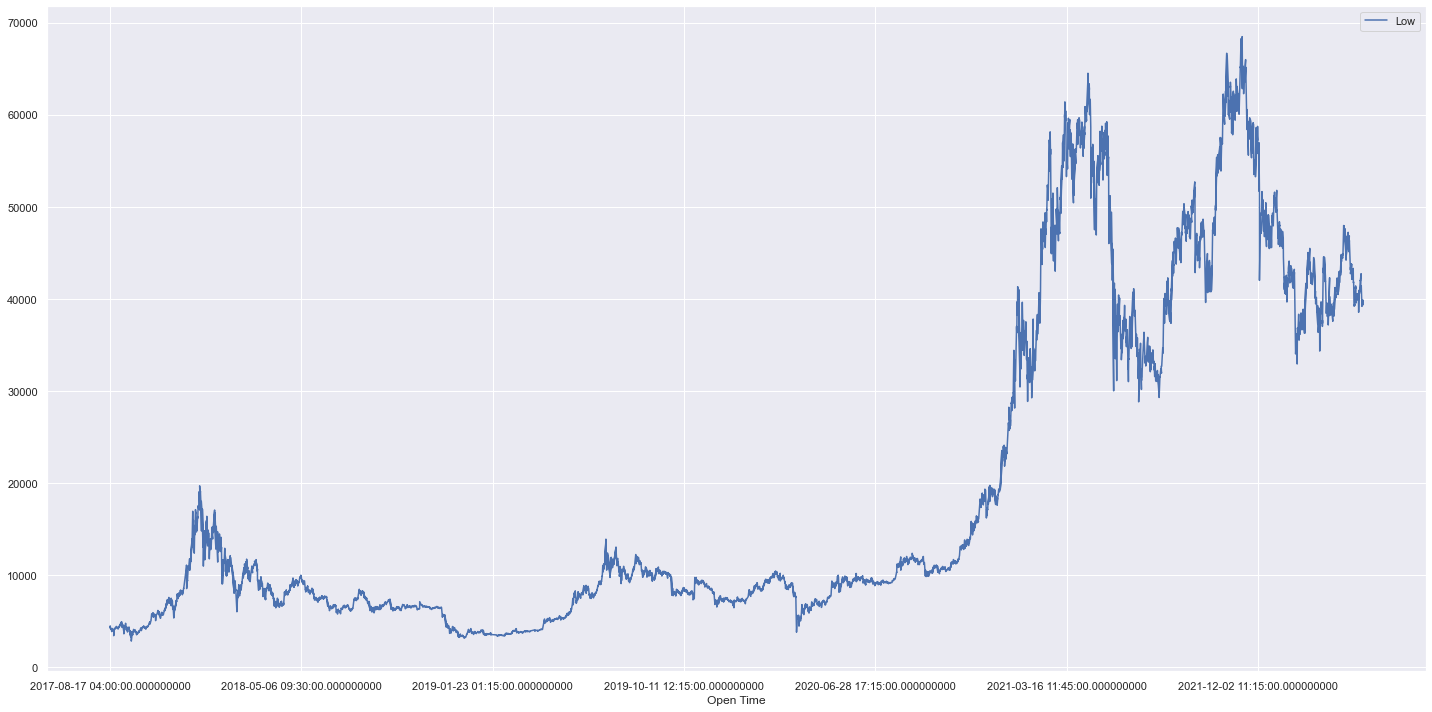

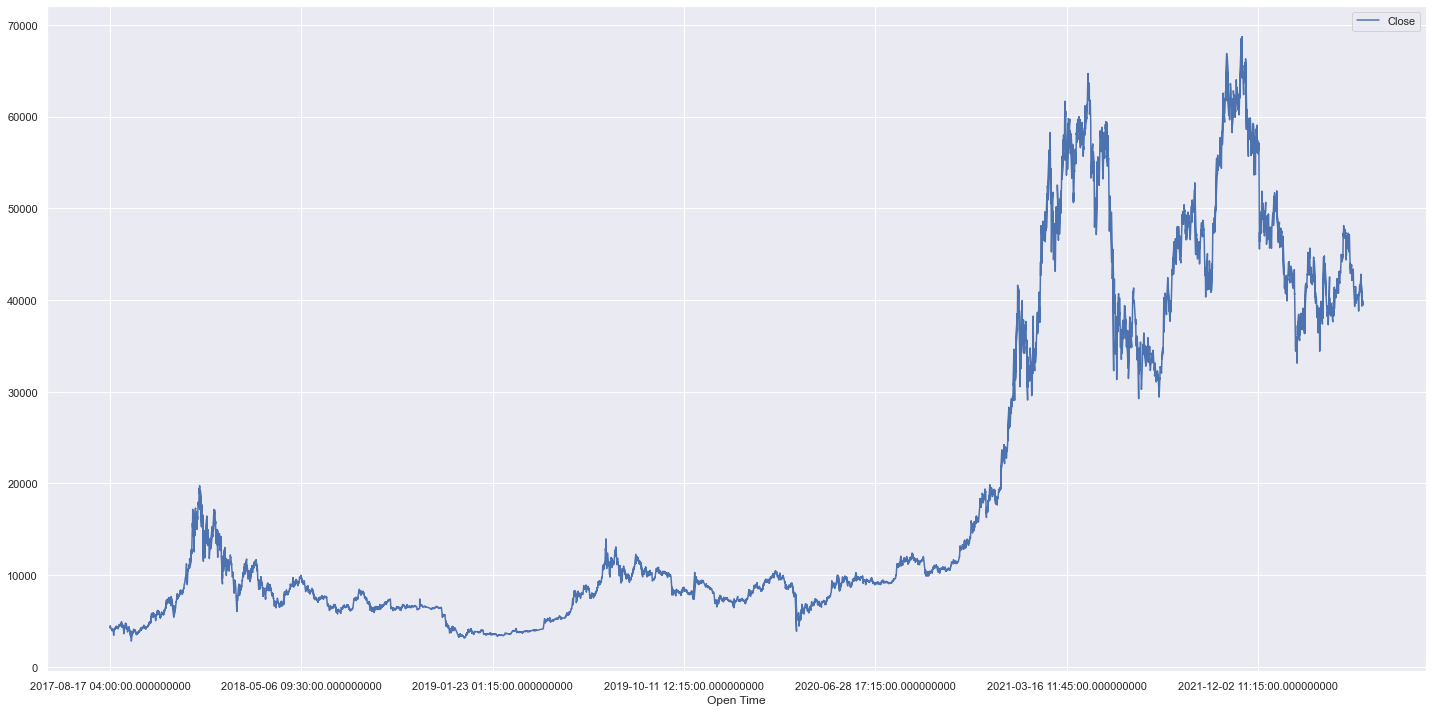

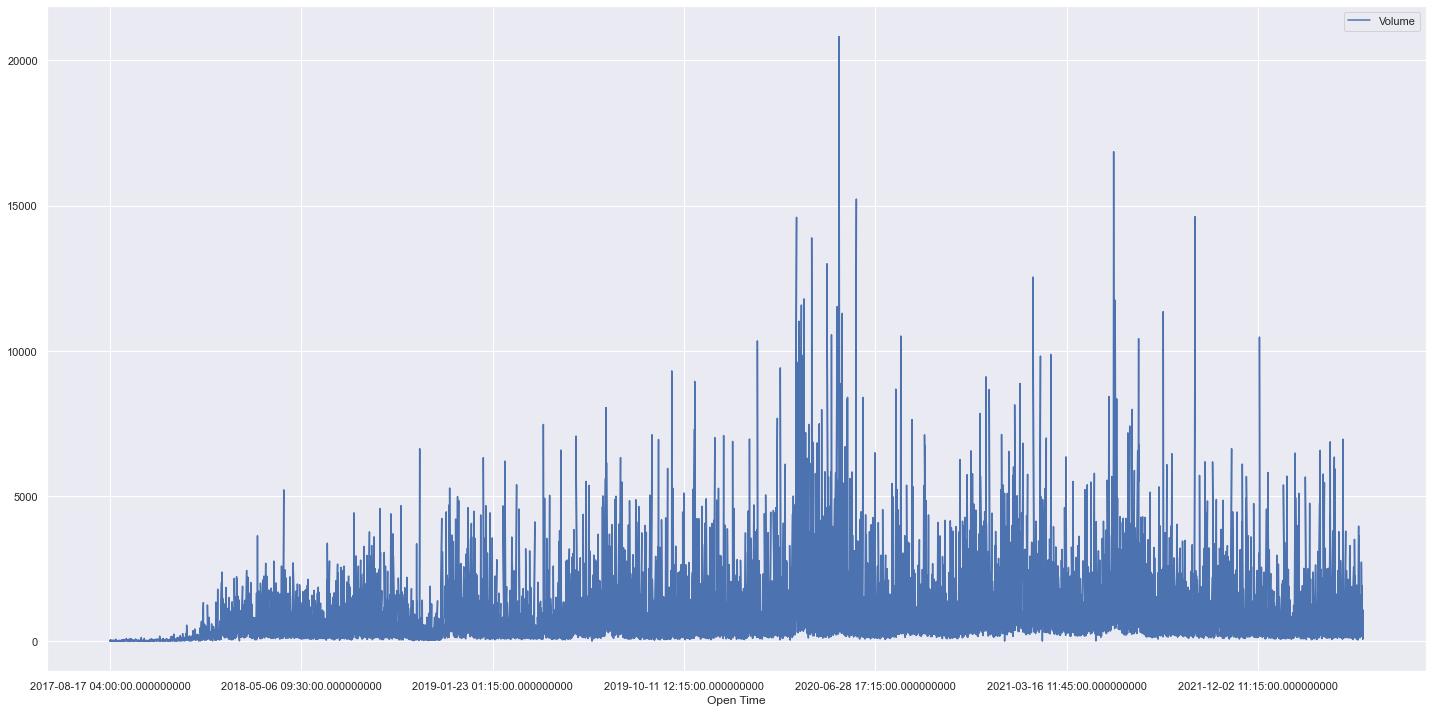

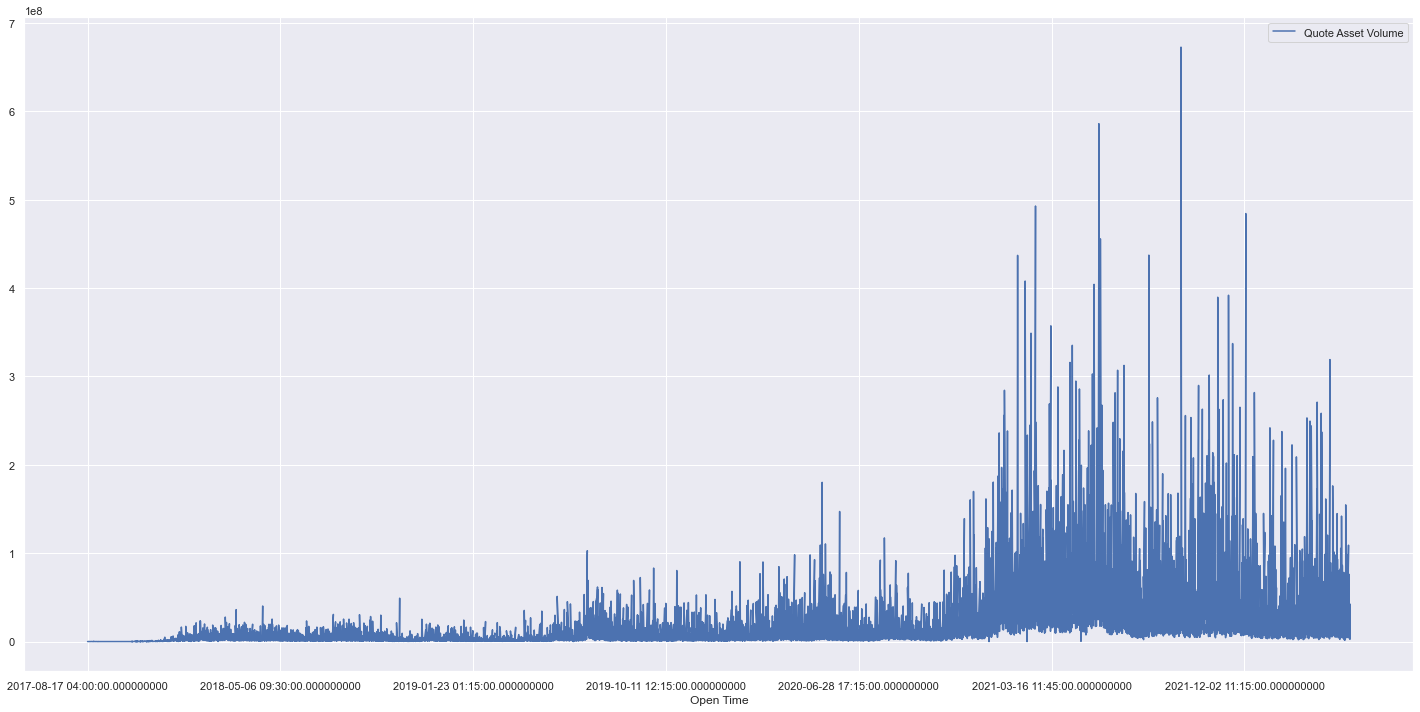

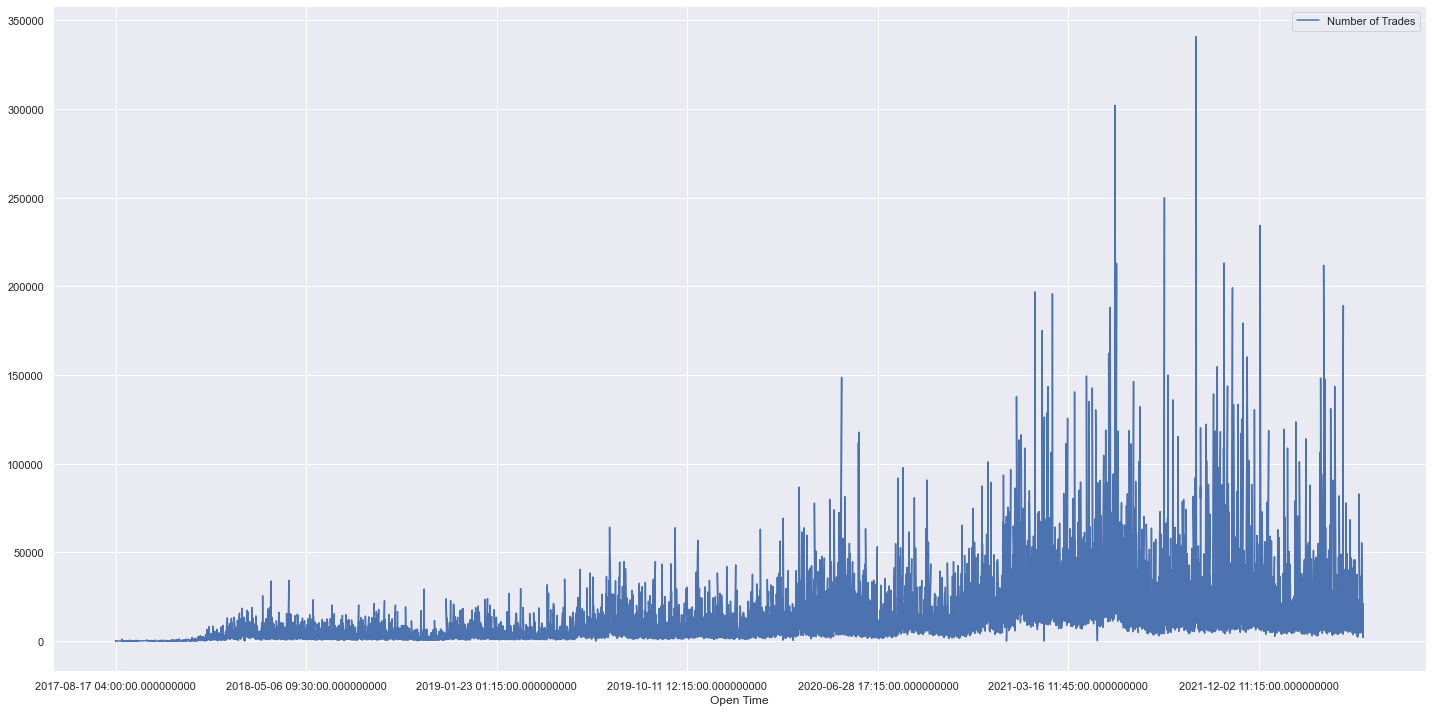

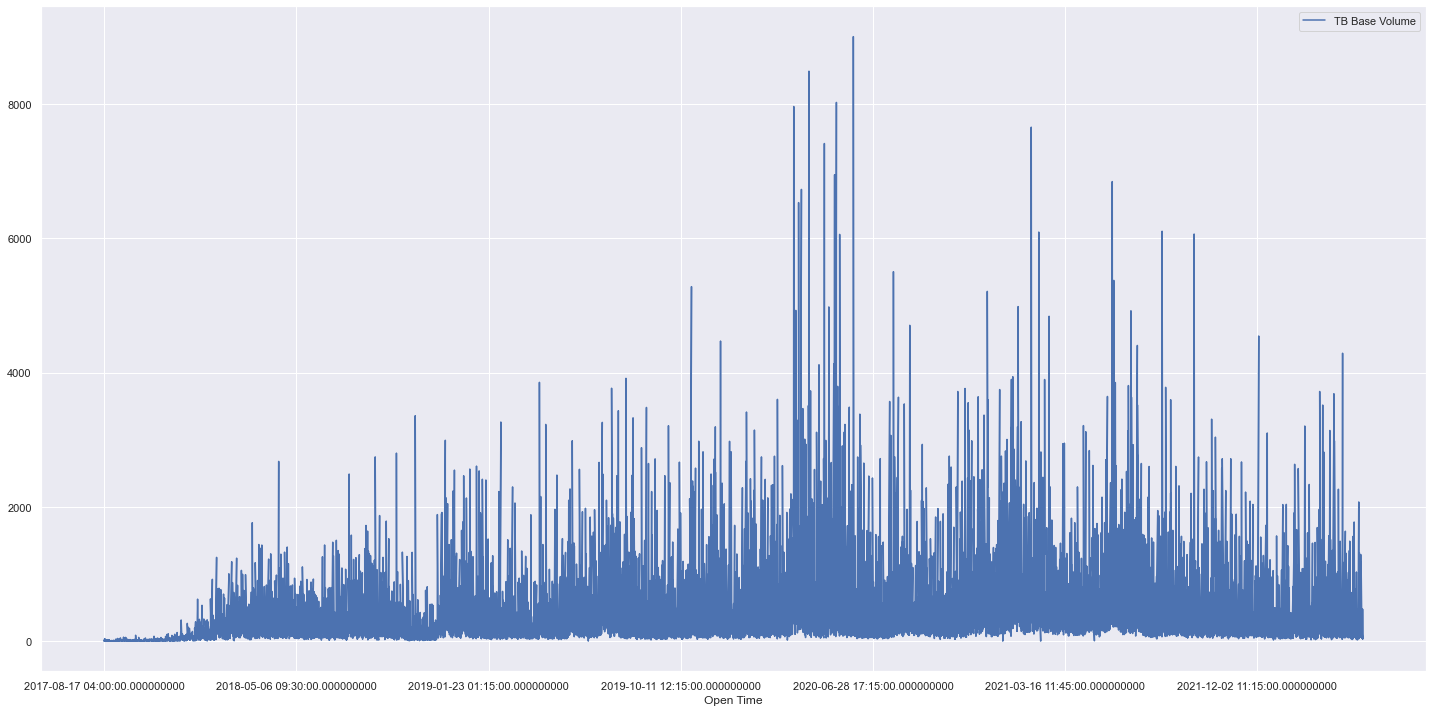

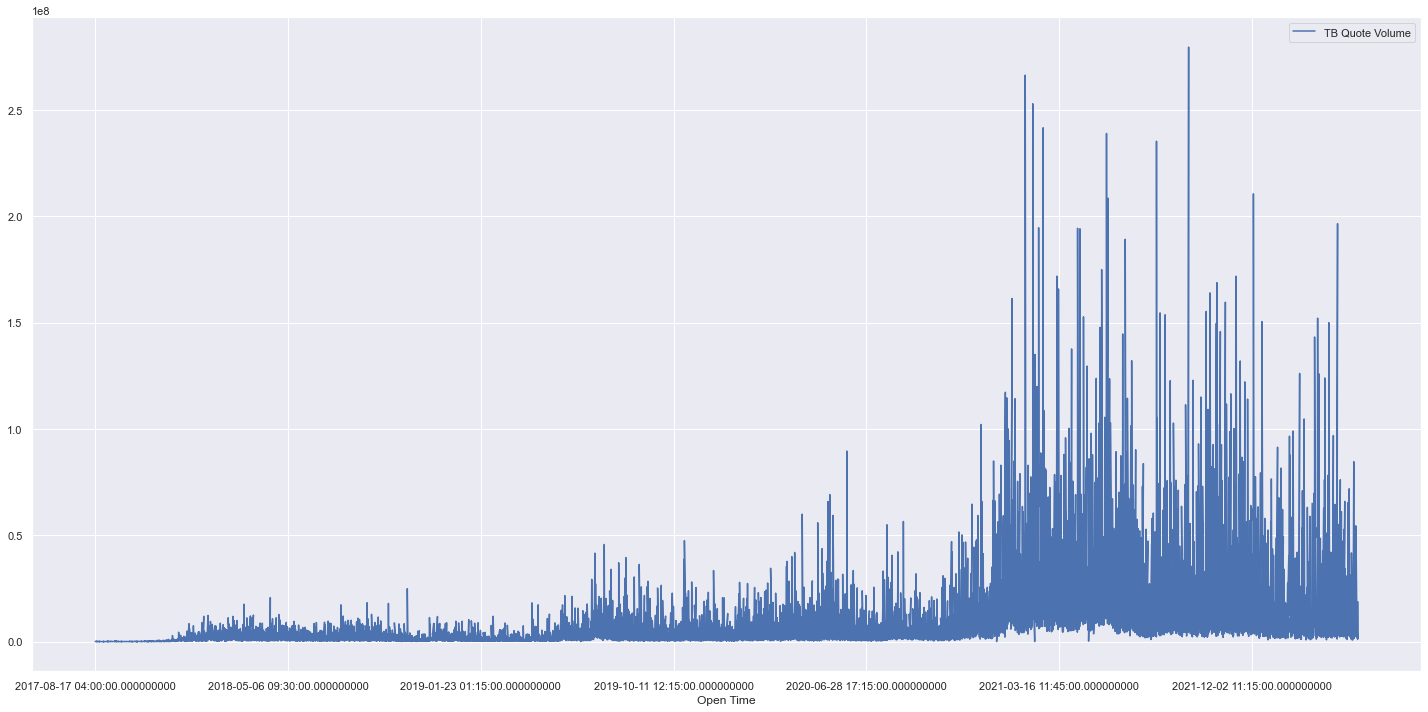

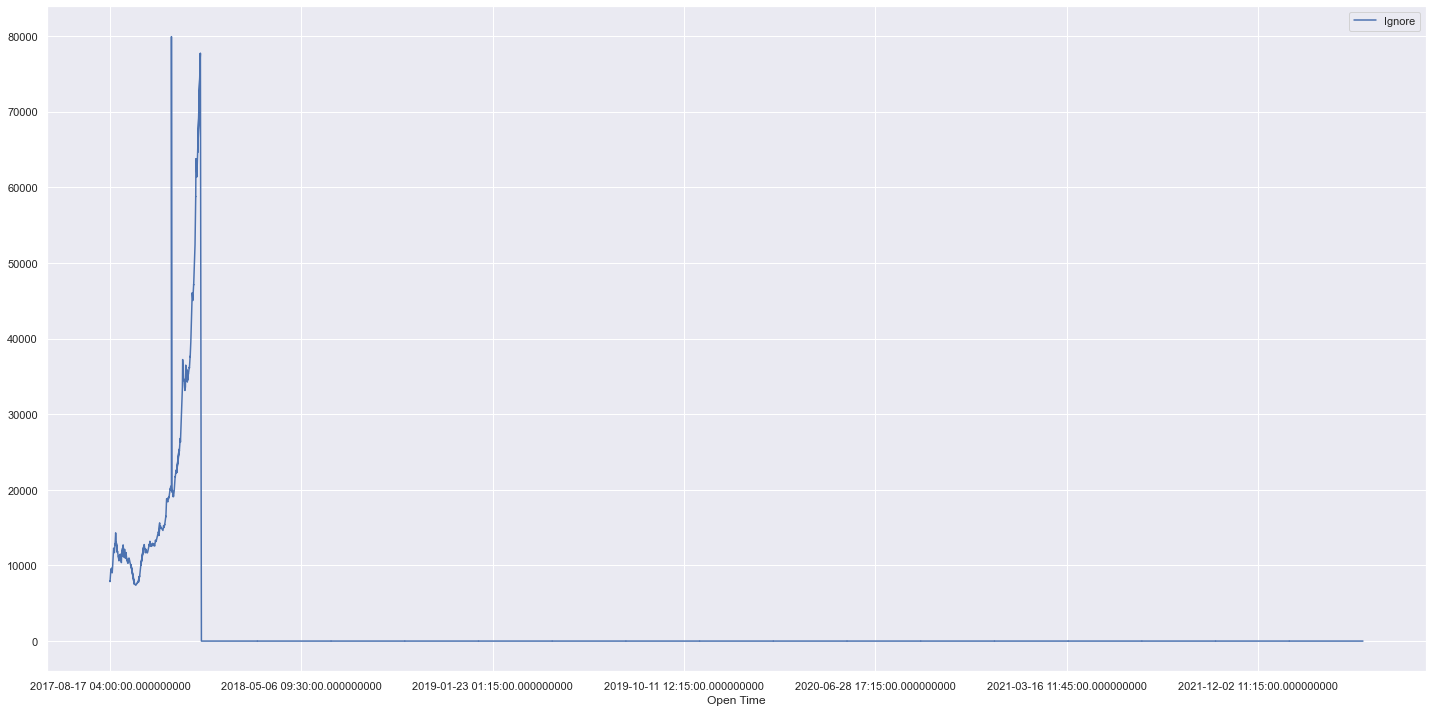

In [153]:
for i in df.drop(columns=['Close Time']):
    df[i].plot()
    plt.legend()
    plt.show()

In [290]:
df = pd.read_csv(directory).set_index("Open Time")

df.index = pd.to_datetime(df.index)
df = df.resample('H').mean().reset_index().iloc[-400:]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Open Time'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Manipulation de data
- (1) Combien de données sont manquantes
    
- (2) Comparez la moyenne des données
    - Tips: .describe()
- (3) Vérifier s'il y a des duplicata de données
    - Tips **duplicated()**

In [291]:
df = pd.read_csv(directory).set_index("Open Time")

df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Close Time', 'Ignore'])
df = df.resample('H').mean()
## Données manquantes 
print(df.isna().sum())
print("")

## Comparer la moyenne
#print(df.describe())

## Duplicata de données
print("Duplicata:", (df.duplicated(keep=False)*1).sum())
df = df.drop_duplicates()
print("Duplicata:", (df.duplicated(keep=False)*1).sum())
df

Open                  126
High                  126
Low                   126
Close                 126
Volume                126
Quote Asset Volume    126
Number of Trades      126
TB Base Volume        126
TB Quote Volume       126
dtype: int64

Duplicata: 126
Duplicata: 0


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
Open Time,,,,,,,,,
2017-08-17 04:00:00,4278.257500,4293.6650,4270.5400,4285.457500,11.795252,5.059153e+04,42.750000,8.790126,3.773812e+04
2017-08-17 05:00:00,4311.467500,4321.0025,4301.2150,4307.750000,5.808729,2.507621e+04,25.500000,5.362018,2.315207e+04
2017-08-17 06:00:00,4328.440000,4337.8700,4317.9850,4327.705000,1.807423,7.820578e+03,9.000000,1.200715,5.198829e+03
2017-08-17 07:00:00,4296.700000,4314.4975,4296.7000,4314.497500,1.110812,4.810265e+03,6.250000,0.650573,2.822837e+03
2017-08-17 08:00:00,4353.857500,4364.9900,4353.6775,4360.697500,0.243202,1.059876e+03,7.000000,0.203664,8.881867e+02
...,...,...,...,...,...,...,...,...,...
2022-04-23 21:00:00,39835.427500,39880.9475,39809.5075,39860.615000,107.133495,4.268726e+06,4569.500000,57.089195,2.274660e+06
2022-04-23 22:00:00,39881.100000,39913.6600,39832.1425,39861.442500,115.195105,4.592888e+06,4953.750000,56.188780,2.240376e+06
2022-04-23 23:00:00,39731.222500,39741.3825,39571.4850,39637.532500,421.458538,1.667338e+07,9456.250000,187.617050,7.421652e+06


In [292]:
df.resample('Y').mean()['Open']

Open Time
2017-12-31     7575.439172
2018-12-31     7540.758593
2019-12-31     7353.058515
2020-12-31    11066.453639
2021-12-31    47357.874122
2022-12-31    41462.449436
Freq: A-DEC, Name: Open, dtype: float64

- Faire un rolling sur 24h de toutes les variables (for loop)
- Faire la même chose avec resample
- Refaire les deux avec std
- Injecter ca dans la df

# 4 Resampling

- (1) Mettre l'index de temps
- (2) Changer l'index en datetime
    - Tips: **to_datetime()**
    
- (3) Supprimer la colonnes (Close Time)

- (3 bis) Ressample en heure
- (4) Ajouter une colonne rowlling sur 2, 20 et 100 pour toutes les collones
- (5) Ajouter un prefix pour le nom de ces nouvelles variables
    - Tips **add_prefix()**
- (5) Ajouter ces colonnes à votre data frame
    - Tips: **concat()**


- (6) Vérifier les données manquantes
- (7) Drop les lignes contenant des données manquantes



In [381]:
df = pd.read_csv(directory)

##Mettre l'index temps
df = df.set_index("Open Time")

## Changer l'indexe en datetime
df.index = pd.to_datetime(df.index)


## Supprimer la colonne Close time
df = df.drop(columns=['Close Time'])

## Ressample jour
df = df.resample('H').mean()

## Ajouter une column rolling 
rolling = []
rolling_name = []
for i in [2, 20, 100]:
    rolling.append(df.rolling(window=i).mean().add_prefix("Rolling_"+str(i)+' '))
    
df = pd.concat([df , pd.concat(rolling,1)],1)


## Données manquantes 
print(df.isna().sum())
print("")

## Drop données manquantes
df = df.dropna()
print(df.isna().sum())
print("")


Open                               126
High                               126
Low                                126
Close                              126
Volume                             126
Quote Asset Volume                 126
Number of Trades                   126
TB Base Volume                     126
TB Quote Volume                    126
Ignore                             126
Rolling_2 Open                     154
Rolling_2 High                     154
Rolling_2 Low                      154
Rolling_2 Close                    154
Rolling_2 Volume                   154
Rolling_2 Quote Asset Volume       154
Rolling_2 Number of Trades         154
Rolling_2 TB Base Volume           154
Rolling_2 TB Quote Volume          154
Rolling_2 Ignore                   154
Rolling_20 Open                    658
Rolling_20 High                    658
Rolling_20 Low                     658
Rolling_20 Close                   658
Rolling_20 Volume                  658
Rolling_20 Quote Asset Vo

In [308]:
df = pd.read_csv(directory).set_index("Open Time")

df.index = pd.to_datetime(df.index)
df

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Open Time,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:14:59.999000064,9.333621e+03,9,0.489061,2.089105e+03,7958.417415
2017-08-17 04:15:00,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:29:59.999000064,3.889113e+04,40,3.447113,1.470393e+04,7922.579933
2017-08-17 04:30:00,4280.00,4310.07,4267.99,4310.07,21.923552,2017-08-17 04:44:59.999000064,9.408092e+04,58,20.421317,8.762098e+04,7912.494217
2017-08-17 04:45:00,4310.07,4313.62,4291.37,4308.83,13.948531,2017-08-17 04:59:59.999000064,6.006047e+04,64,10.803012,4.653846e+04,7887.635513
2017-08-17 05:00:00,4308.83,4328.69,4304.31,4304.31,5.101153,2017-08-17 05:14:59.999000064,2.200653e+04,44,3.496635,1.509378e+04,7865.654419
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-24 00:30:00,39637.92,39654.56,39595.10,39621.66,145.907620,2022-04-24 00:44:59.999000064,5.781548e+06,4681,66.026900,2.616110e+06,0.000000
2022-04-24 00:45:00,39621.66,39624.00,39548.06,39560.56,123.163250,2022-04-24 00:59:59.999000064,4.875416e+06,4458,64.605880,2.557297e+06,0.000000
2022-04-24 01:00:00,39560.55,39636.77,39517.59,39611.82,285.960610,2022-04-24 01:14:59.999000064,1.132205e+07,5746,118.160530,4.677866e+06,0.000000


In [328]:
df_std_24

,std_24_Open,std_24_High,std_24_Low,std_24_Close,std_24_Volume,std_24_Quote Asset Volume,std_24_Number of Trades,std_24_TB Base Volume,std_24_TB Quote Volume
Open Time,,,,,,,,,
2017-08-17,64.834269,61.822077,65.601531,63.169071,5.921953,2.558723e+04,27.879944,4.398168,1.896216e+04
2017-08-18,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
2017-08-19,55.962737,53.540013,61.892179,56.545293,3.726916,1.507956e+04,16.538736,2.568781,1.047773e+04
2017-08-20,26.665435,28.099835,23.344488,27.020790,5.352967,2.215788e+04,21.150789,4.606881,1.906423e+04
2017-08-21,38.555809,33.319214,42.399344,37.819574,5.796885,2.351977e+04,21.638708,5.076035,2.060310e+04
...,...,...,...,...,...,...,...,...,...
2022-04-20,230.800288,242.425515,222.727952,232.449811,241.122014,1.008058e+07,4019.105953,120.645363,5.050165e+06
2022-04-21,602.229261,615.027320,626.185678,613.139722,330.536210,1.379600e+07,5664.432049,161.732465,6.789772e+06
2022-04-22,473.835750,468.264311,486.455929,474.163783,279.032668,1.110293e+07,4786.639846,136.344873,5.421832e+06


In [334]:
df.index

DatetimeIndex(['2017-08-17 04:00:00', '2017-08-17 04:15:00',
               '2017-08-17 04:30:00', '2017-08-17 04:45:00',
               '2017-08-17 05:00:00', '2017-08-17 05:15:00',
               '2017-08-17 05:30:00', '2017-08-17 05:45:00',
               '2017-08-17 06:00:00', '2017-08-17 06:15:00',
               ...
               '2022-04-23 23:15:00', '2022-04-23 23:30:00',
               '2022-04-23 23:45:00', '2022-04-24 00:00:00',
               '2022-04-24 00:15:00', '2022-04-24 00:30:00',
               '2022-04-24 00:45:00', '2022-04-24 01:00:00',
               '2022-04-24 01:15:00', '2022-04-24 01:30:00'],
              dtype='datetime64[ns]', name='Open Time', length=163690, freq=None)

In [346]:
df_mean_24.index#.asfreq("H")

DatetimeIndex(['2017-08-17', '2017-08-18', '2017-08-19', '2017-08-20',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-26',
               ...
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24'],
              dtype='datetime64[ns]', name='Open Time', length=1712, freq='D')

- Rolling sur 24h ==> Mean et la Std ==> lissé ==> 1 valeur par ligne
- Resample par jour ==> Mean et Std ==> par step c'est à dire une valeur par jour
    - frequence qui est Daily (jour) alors que notre df est hourly (par heure)
    - change la frequence avec .asfreq("H")
- Concat de toutes les variables ==> et on a donc des Nan pour toutes les heures du resample sauf à 00h
- forward fill pour combler ces valeurs

In [384]:
df = pd.read_csv(directory).set_index("Open Time").dropna()

df.index = pd.to_datetime(df.index)
df = df.drop(columns=['Close Time', 'Ignore'])
df = df.resample('H').mean()
## Données manquantes 
print(df.isna().sum())
print("")

## Comparer la moyenne
#print(df.describe())

## Duplicata de données
print("Duplicata:", (df.duplicated(keep=False)*1).sum())
df = df.drop_duplicates()
print("Duplicata:", (df.duplicated(keep=False)*1).sum())

df_roll_mean_24 = df.rolling(window=24).mean()
df_mean_24 = df.resample('D').mean()
df_roll_mean_24 = df_roll_mean_24.add_prefix('Roll_Mean_24_')
df_mean_24 = df_mean_24.add_prefix('Mean_24_')


df_roll_std_24 = df.rolling(window=24).std()
df_std_24 = df.resample('D').std()
df_roll_std_24 = df_roll_std_24.add_prefix('Roll_std_24_')
df_std_24 = df_std_24.add_prefix('std_24_')



df = pd.concat([df, df_roll_mean_24, df_mean_24.asfreq("H"), df_roll_std_24,
          df_std_24.asfreq("H")],1).ffill().dropna()

df

Open                  126
High                  126
Low                   126
Close                 126
Volume                126
Quote Asset Volume    126
Number of Trades      126
TB Base Volume        126
TB Quote Volume       126
dtype: int64

Duplicata: 126
Duplicata: 0


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Roll_Mean_24_Open,...,Roll_std_24_TB Quote Volume,std_24_Open,std_24_High,std_24_Low,std_24_Close,std_24_Volume,std_24_Quote Asset Volume,std_24_Number of Trades,std_24_TB Base Volume,std_24_TB Quote Volume
Open Time,,,,,,,,,,,,,,,,,,,,,
2017-08-18 03:00:00,4269.012500,4298.5825,4248.1525,4280.917500,16.000337,6.837375e+04,76.500000,13.015393,5.564005e+04,4339.863542,...,2.000454e+04,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
2017-08-18 04:00:00,4270.447500,4284.0325,4248.0325,4263.987500,12.699379,5.412816e+04,66.750000,11.456547,4.884150e+04,4339.538125,...,2.013978e+04,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
2017-08-18 05:00:00,4294.422500,4320.4000,4272.8975,4316.142500,16.042321,6.889801e+04,91.750000,11.472063,4.928882e+04,4338.827917,...,2.001401e+04,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
2017-08-18 06:00:00,4301.840000,4306.8700,4255.0350,4287.677500,16.058856,6.881115e+04,74.500000,11.857150,5.083674e+04,4337.719583,...,1.879510e+04,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
2017-08-18 07:00:00,4287.677500,4300.0200,4274.1150,4295.357500,17.296701,7.415136e+04,50.750000,16.125915,6.913514e+04,4337.343646,...,1.780391e+04,99.794831,96.455313,104.965425,101.720097,5.057020,2.176132e+04,14.290176,4.192549,1.809759e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-23 21:00:00,39835.427500,39880.9475,39809.5075,39860.615000,107.133495,4.268726e+06,4569.500000,57.089195,2.274660e+06,39662.189479,...,1.613304e+06,117.254988,116.060908,118.492785,118.115218,89.036383,3.531459e+06,2080.261105,44.771420,1.775898e+06
2022-04-23 22:00:00,39881.100000,39913.6600,39832.1425,39861.442500,115.195105,4.592888e+06,4953.750000,56.188780,2.240376e+06,39670.470729,...,1.641941e+06,117.254988,116.060908,118.492785,118.115218,89.036383,3.531459e+06,2080.261105,44.771420,1.775898e+06
2022-04-23 23:00:00,39731.222500,39741.3825,39571.4850,39637.532500,421.458538,1.667338e+07,9456.250000,187.617050,7.421652e+06,39670.503438,...,1.775898e+06,117.254988,116.060908,118.492785,118.115218,89.036383,3.531459e+06,2080.261105,44.771420,1.775898e+06


In [352]:
print(len(df))
print(len(df.dropna()))

41066
41066


In [354]:
df.Open

Open Time
2017-08-17 00:00:00     4278.257500
2017-08-17 01:00:00     4278.257500
2017-08-17 02:00:00     4278.257500
2017-08-17 03:00:00     4278.257500
2017-08-17 04:00:00     4278.257500
                           ...     
2022-04-23 21:00:00    39835.427500
2022-04-23 22:00:00    39881.100000
2022-04-23 23:00:00    39731.222500
2022-04-24 00:00:00    39562.267500
2022-04-24 01:00:00    39585.786667
Freq: H, Name: Open, Length: 41066, dtype: float64

In [355]:
adfuller(df.Open)

(-0.960546004518043,
 0.7673809863006051,
 51,
 41014,
 {'1%': -3.4305094506588505,
  '5%': -2.861610473576263,
  '10%': -2.566807510813108},
 540839.9678321453)

In [386]:
p_value = []
for i in df.columns:
    p_value.append(adfuller(df[i])[1])
p_valueS = pd.DataFrame(p_value, index=df.columns)

In [387]:
for i in p_valueS.index:
    df[i]=df[i].diff()
    

In [388]:
df = df.dropna()

In [389]:
p_value_2 = []
for i in df.columns:
    p_value_2.append(adfuller(df[i])[1])


In [5]:
import copy 
df_org = copy.deepcopy(df)


  
- (1) Faire le test afuller pour toutes les colonnes
- (2) Faire une dataFrame avec toutes les résultas (p-value) de chaque colonne
- (3) Sélectionner toutes les p-value > 0.05
- (4) faire la différence de chacune de ces colonnes 
    - Tips: **diff()**
    
- (5) Drop na
- (6) Faire un second test adfuller pour toutes les colonnes

In [13]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

## Faire un test adfuller pour toutes les colonnes
result_stationnary = []
for i in df.columns:
    result_stationnary.append(adfuller(df[i])[1])
    
resultat_df = pd.DataFrame(result_stationnary, index=df.columns)

## Selectionner toutes les colonnes non stationnaires
resultat_df_above_005 = resultat_df[resultat_df>0.05].dropna()

## faire la diff de ces colonnes
for i in resultat_df_above_005.index:
    df[i]= df[i].diff()
    
df = df.dropna()

## Reaire un test adfuller pour toutes les colonnes
result_stationnary_2 = []
for i in df.columns:
    result_stationnary_2.append(adfuller(df[i])[1])
    
resultat_df_2 = pd.DataFrame(result_stationnary_2, index=df.columns)
resultat_df_2_above_005 = resultat_df_2[resultat_df_2>0.05].dropna()

## Créer Target
- (1) Faire un shift de la colonne open de 24 (attention au sens). L'idée est de prédire la valeur des 24 prochaines valeurs
    - Tips: **shift()**

In [400]:
df['Target'] = df['Open'].shift(periods=-24)

<AxesSubplot:xlabel='Open Time'>

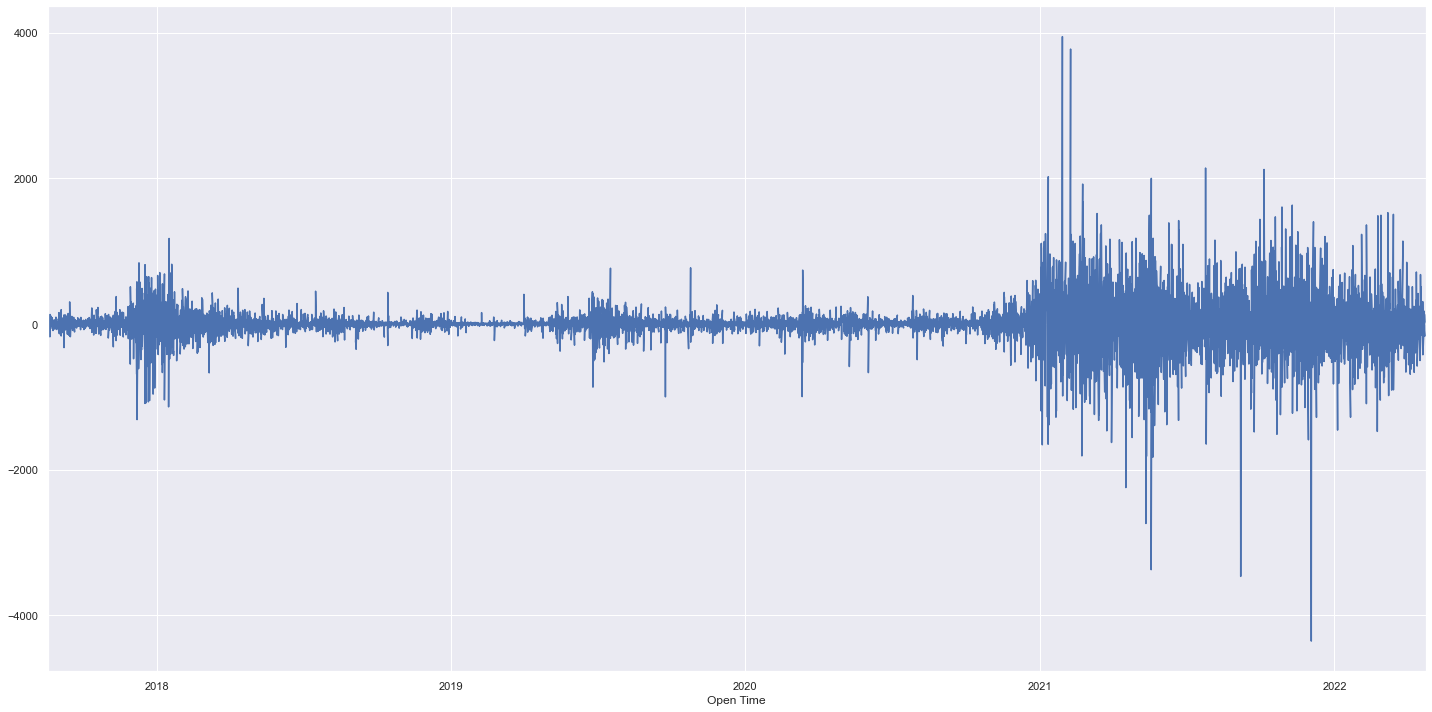

In [401]:
df['Target'].plot()

## Split le data set

- (1) Utiliser la fonction disponoble pour créer des bootstrap de notre time series et faire des plots en Mois  ==> NON
- (2) Faire une fonction qui coupe notre bootstrap data set à 70% en train et test set

In [444]:
def seasonal_bootstrap(df, freq, shift_max=0, n_samples=1, replace=False,
                       n_jobs=1):

    leap_mask = (~((df.index.month == 2) & (df.index.day == 29)))
    new_df = df.copy() #df without leap years
    new_df = new_df[leap_mask]       
    parallel = Parallel(n_jobs=n_jobs)
    
    def create_seasonal_bootstrap(i):
        """
        Returns
        -------
        df_res : pd.DataFrame
            seasonally bootstrapped data
        """
        random.seed(i)
                
        if replace == True:
            index = new_df.index
            blocks = create_blocks(new_df, freq, shift_max)
            #convert list of blocks into array of blocks in order to use indexing
            b = np.empty(len(blocks), dtype=object)
            b[:] = blocks
            blocks = b
            lengths = [len(block) for block in blocks]
            ndays = np.bincount(lengths).argmax()
            blocks_to_shuffle = np.where(lengths == ndays)[0]
            new_indices = np.copy(blocks_to_shuffle)
            new_indices = np.random.choice(new_indices, len(new_indices),
                                           replace=True)
            blocks[blocks_to_shuffle]=blocks[new_indices]
                
        else:
            index = df.index
            blocks = create_blocks(df, freq, shift_max)
            random.shuffle(blocks)
        
        #out-of-bag indices
        
                
        df_res =  pd.concat(blocks)

        if isinstance(df_res, pd.DataFrame):
            df_res.set_index(index, inplace=True)
            
        else:
            df_res.index = index
            
        return df_res
    
    
    return parallel(
            delayed(create_seasonal_bootstrap)(i) for i in range(n_samples)
            )

def create_blocks(df, freq, shift_max=0):
  
    shift = random.randint(-shift_max, shift_max)
    df = df.shift(shift)
    #we retrieve groups through the groupby method            
    blocks = deque([gp[1] for gp in df.groupby(pd.Grouper(freq=freq))])
        
    return blocks



#df_clean =  df.interpolate(method = 'linear').ffill().bfill().drop_duplicates()


bootstrap_samples = seasonal_bootstrap(df=df,
                                       freq='W',
                                       shift_max=0,
                                       n_samples=6,
                                       replace=True,
                                       n_jobs=1)

df_bootstrap = bootstrap_samples[1]

In [440]:
#df_bootstrap = df 

In [447]:
def split_data(df, split_fraction):
    split_size = round(len(df)*split_fraction)
    train = df[:split_size]
    test = df[split_size:]
    return train, test

train_split, test_split = split_data(df, 0.7)

print('train_split.shape',train_split.shape)
print('test_split.shape',test_split.shape)

train_split.shape (28727, 46)
test_split.shape (12311, 46)


In [448]:
train_split, test_split = split_data(df_bootstrap, 0.7)

print('train_split.shape',train_split.shape)
print('test_split.shape',test_split.shape)

train_split.shape (28710, 46)
test_split.shape (12304, 46)


<AxesSubplot:xlabel='Open Time'>

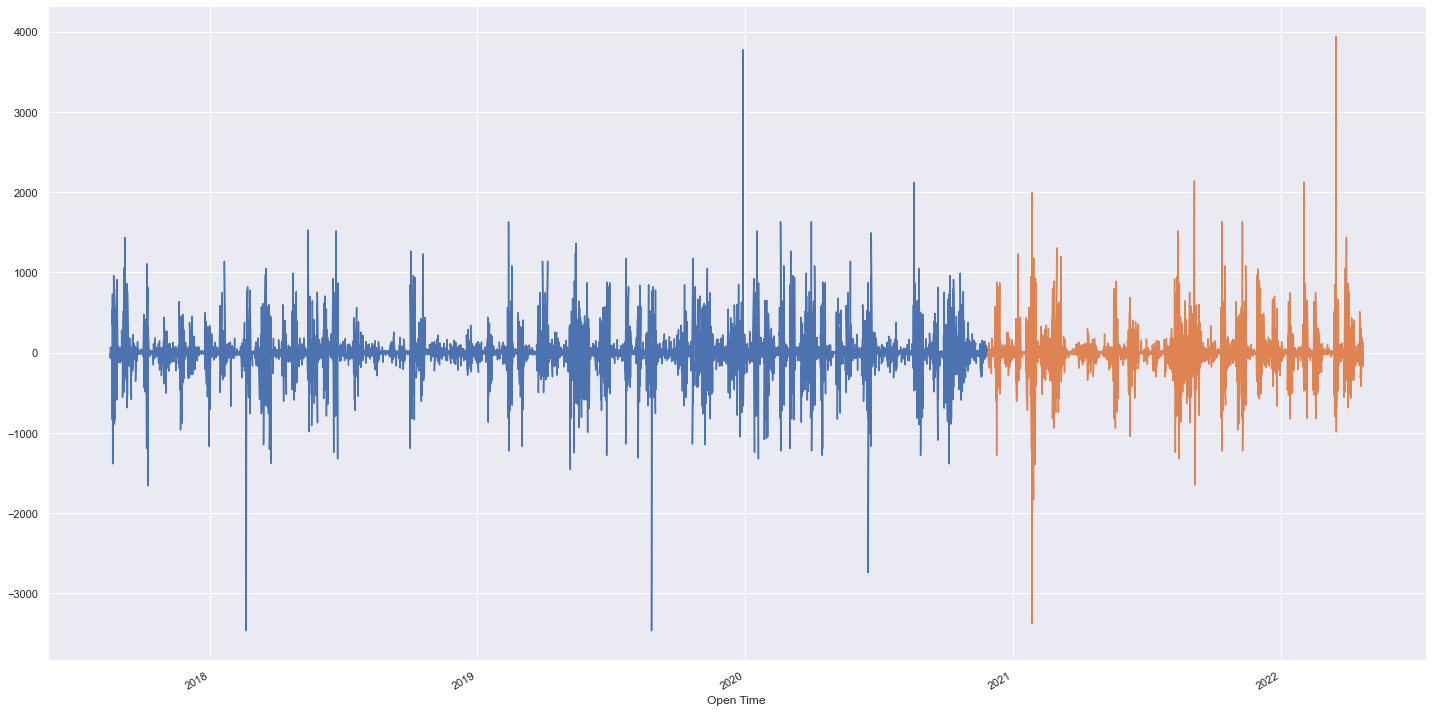

In [450]:
train_split['Target'].plot()
test_split['Target'].plot()

In [459]:
#train_split.to_csv('BTC_train.csv')
#test_split.to_csv('BTC_test.csv')

28710
12304


<AxesSubplot:xlabel='Open Time'>

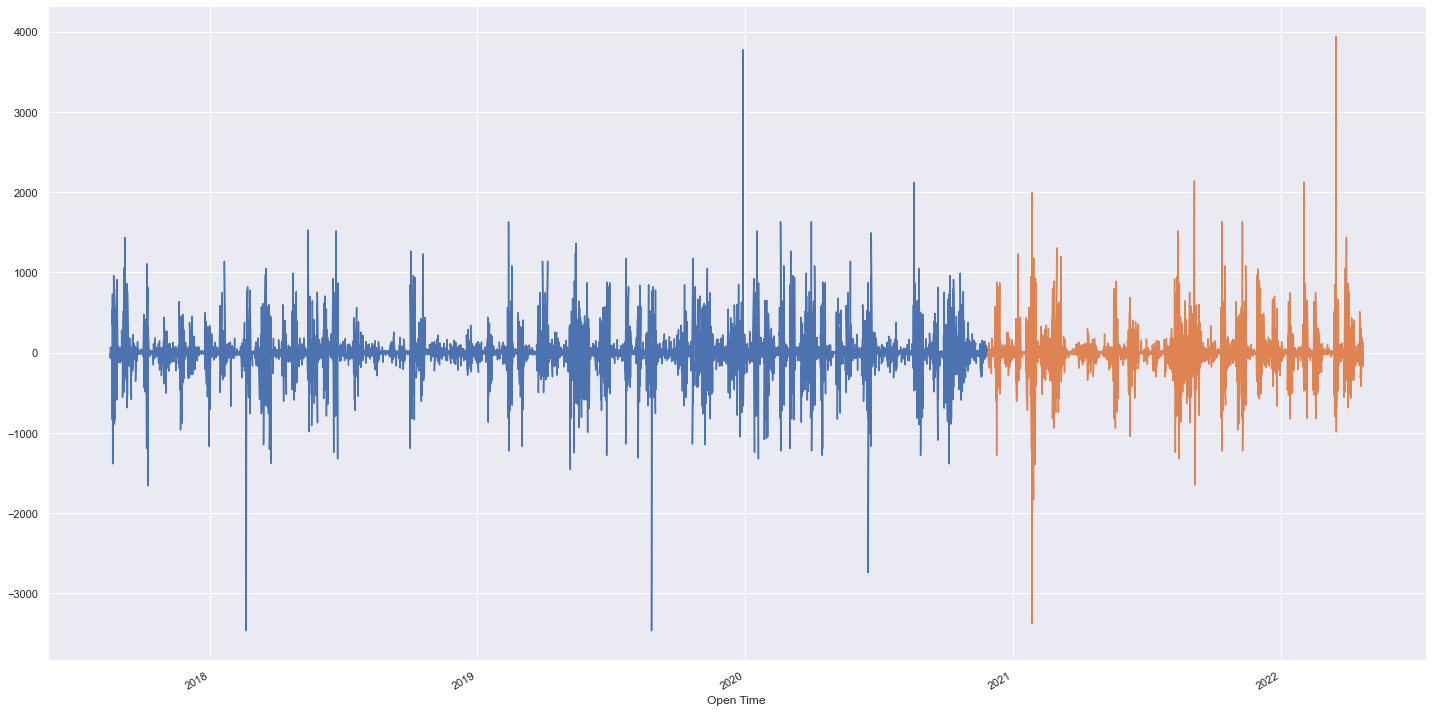

In [511]:
train_split = pd.read_csv('BTC_train.csv').set_index('Open Time')
train_split.index = pd.to_datetime(train_split.index)
test_split = pd.read_csv('BTC_test.csv').set_index('Open Time')
test_split.index = pd.to_datetime(test_split.index)
print(len(train_split))
print(len(test_split))

train_split['Target'].plot()
test_split['Target'].plot()

In [24]:
#df_test_diff = df_org.iloc[len(train_split)+1:].diff().shift(-24).dropna().reset_index()['Open']
#df_test_org =  df_org.iloc[len(train_split):].shift(-24).dropna().reset_index()['Open']

In [25]:
df_org.iloc[len(train_split)+1:]['Open']

Open Time
2020-12-27 00:00:00    27188.606875
2020-12-27 12:00:00    26952.659583
2020-12-28 00:00:00    26953.769792
2020-12-28 12:00:00    27037.708542
2020-12-29 00:00:00    26617.973333
                           ...     
2022-04-22 00:00:00    40529.335625
2022-04-22 12:00:00    39758.142500
2022-04-23 00:00:00    39575.743125
2022-04-23 12:00:00    39765.263750
2022-04-24 00:00:00    39572.347143
Name: Open, Length: 967, dtype: float64

<AxesSubplot:>

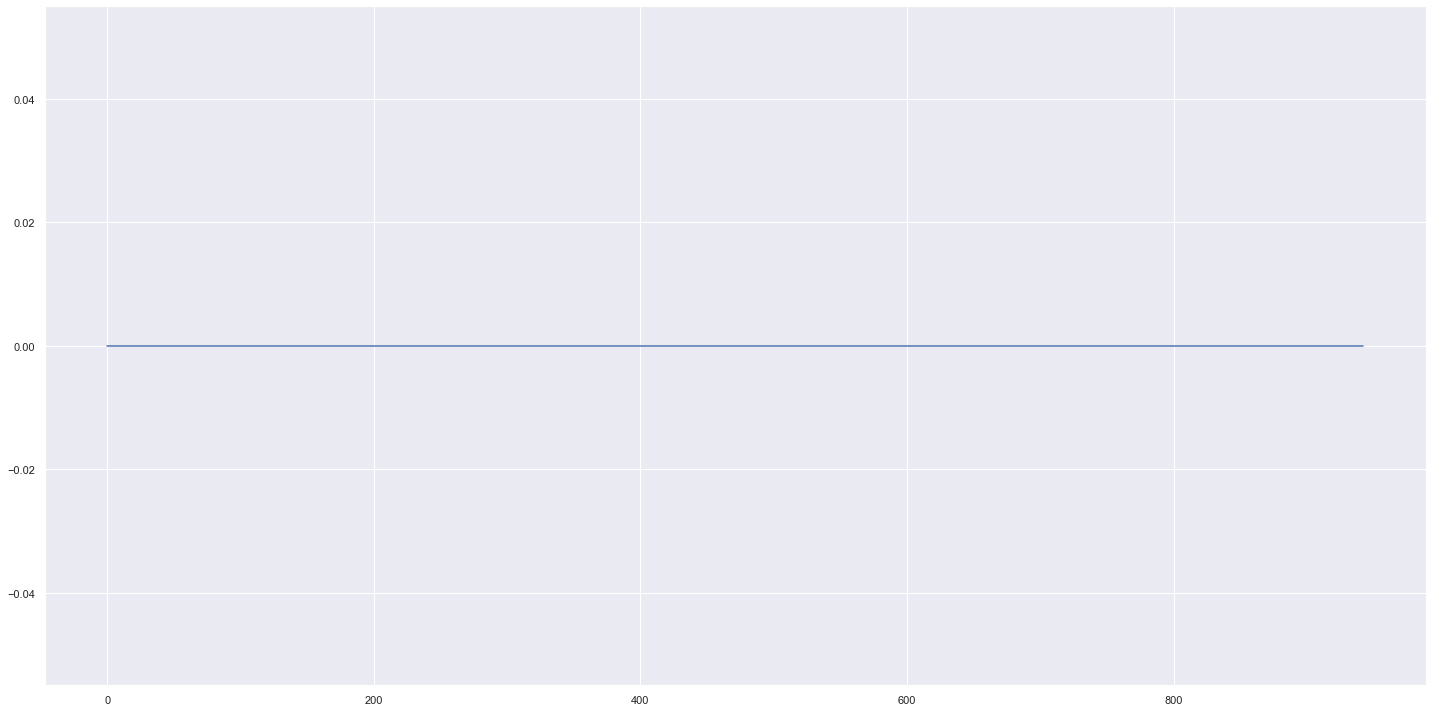

In [26]:
org1 = df_org.iloc[len(train_split)+1:].diff().shift(-24).dropna().reset_index()['Open']
df2 = test_split.reset_index()['Target']
(org1-df2).plot()

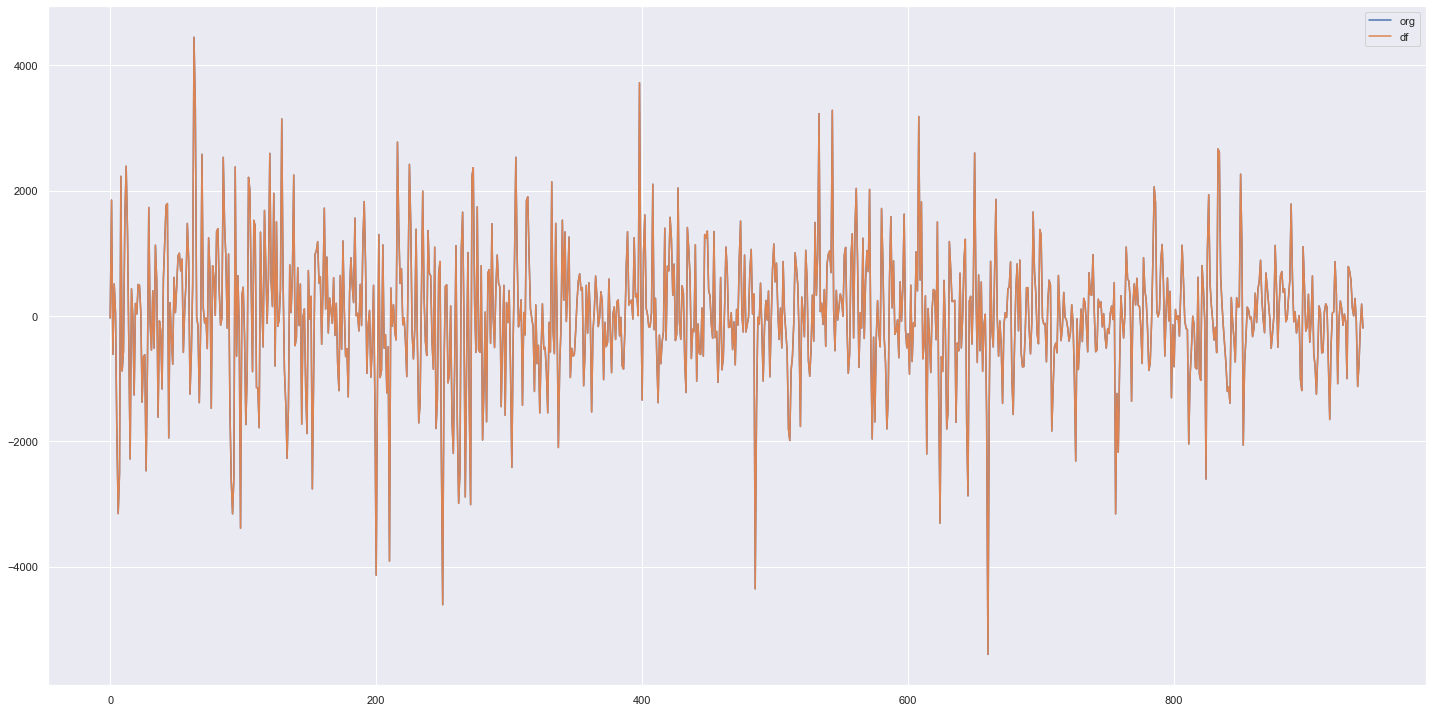

In [27]:
plt.plot(df_org.iloc[len(train_split)+1:].diff().shift(-24).dropna().reset_index()['Open'], label = 'org')
plt.plot(test_split.reset_index()['Target'], label = 'df')
plt.legend()

## Scaling
- (1) Faire un scaling basé sur le training set

In [465]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
## Fit Training || Rescale both train + test set
scaler_train = MinMaxScaler()#StandardScaler()
scaler_train = scaler_train.fit(train_split)
scaled_train = scaler_train.transform(train_split)
scaled_test = scaler_train.transform(test_split)

In [29]:
from pickle import dump
dump(scaler_train, open('scaler_BTC.pkl', 'wb'))



<AxesSubplot:xlabel='Open Time'>

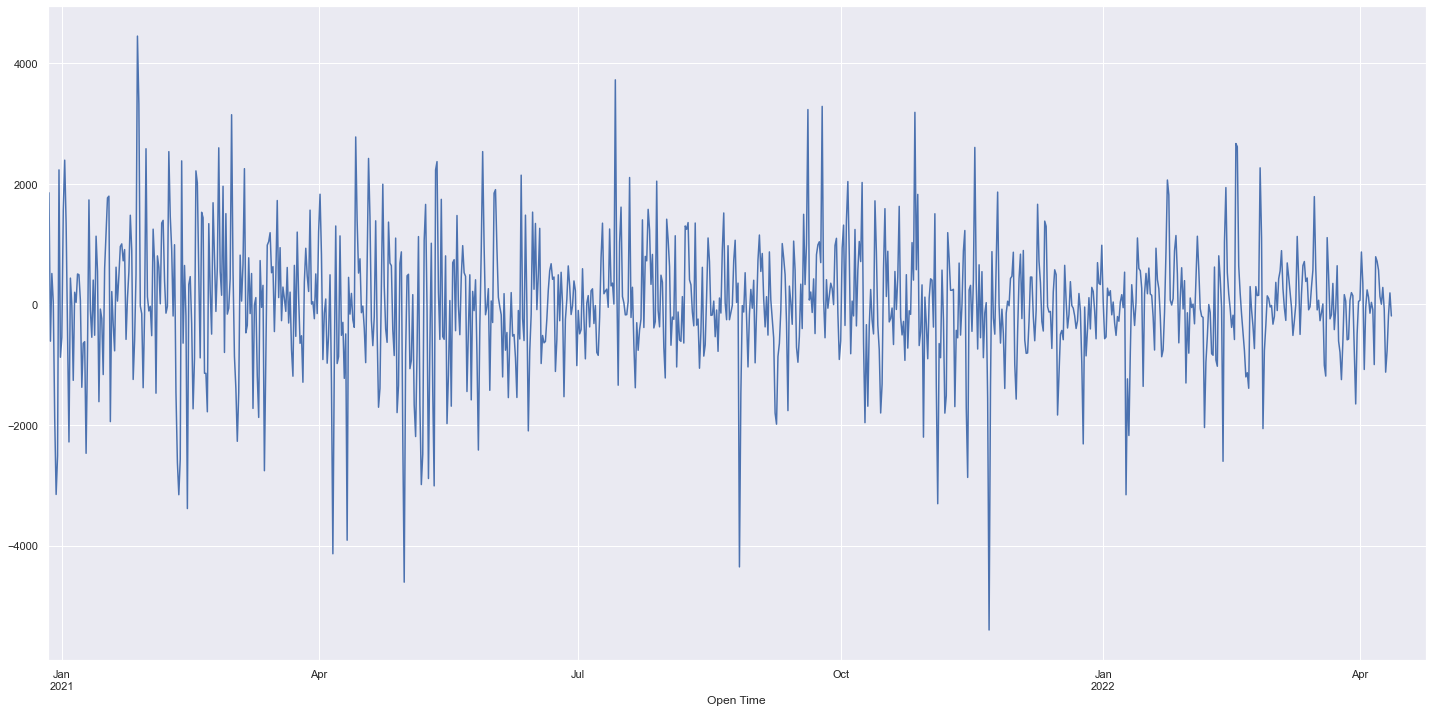

In [30]:
test_split['Target'].plot()

<AxesSubplot:>

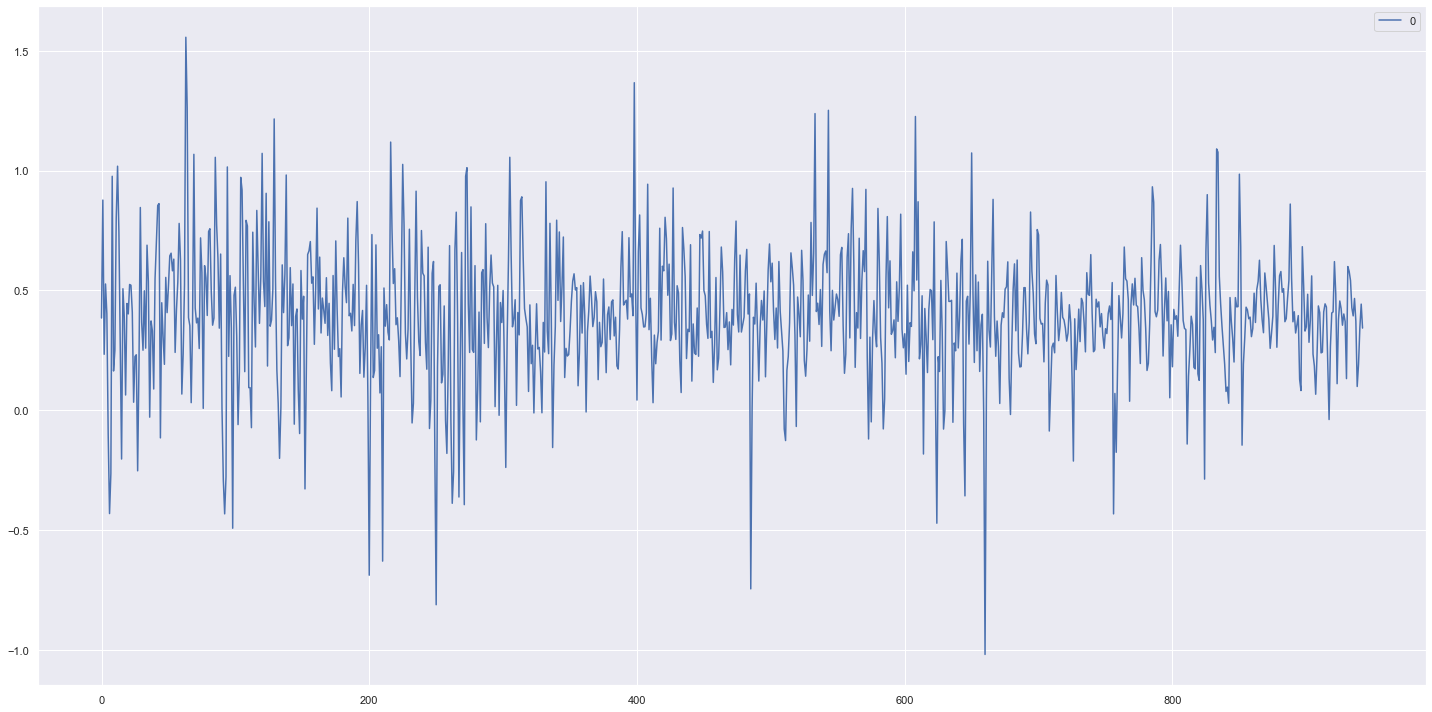

In [31]:
pd.DataFrame(scaled_test[:,-1]).plot()

In [ ]:
def split_X_Y(data_set, n_input):
    X_train = []
    Y_train = []
    for i in range(len(data_set)-n_input):
        X_train.append(data_set[i:i+n_input])
        Y_train.append(data_set[i+n_input:])
    
    return np.array(X_train), np.array(Y_train)

X_train_1, Y_train = split_X_Y(scaled_train, 24)
X_test, Y_test = split_X_Y(scaled_test, 24)
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

## Préparation de données pour le MLP
- (1) Faire un split des séquence en X et Y pour le training et test set. L'idée est de prendre les 24 valeurs précédentes

In [528]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X)[:,:,:-1], np.array(y)[:,-1]



## Sur les températures en France
X_train, Y_train = split_sequence(scaled_train, 24)
X_test, Y_test = split_sequence(scaled_test, 24)
print(X_train.shape)
print(Y_train.shape)
print("")
print(X_test.shape)
print(Y_test.shape)



(28686, 24, 45)
(28686,)

(12280, 24, 45)
(12280,)


In [535]:
scaled_train.shape

(28710, 46)

## Création de Model
Comme nous avons plus d'une seule série temporelle il est indispensable de faire la multiplication des inputs shape. En effet un réseau de neurone de type MLP ne peut pas intégrer 3 dimensions mais simplement 2. 

- (1) calculer la dimension des inputs en utilisant la shape[1] et shape[2] de notre X_train
- (2) Créer une nouvelle matrice à partir de (1) et de X_train étant en deux dimension

In [530]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X = X_train.reshape((X_train.shape[0], n_input))

In [531]:
from keras import backend as K
def loss_mse_sign(y_true, y_pred):
    mse = K.sqrt(K.mean(K.square(y_pred - y_true)))
    sign_equality = ((K.sign(y_true)) == (K.sign(y_pred)))
    sign_equality = K.cast(sign_equality, float)
    return mse / (K.mean(sign_equality)+ 0.000001)

In [532]:
#, validation_data=(X_test, Y_test)

In [536]:
# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X = X_train.reshape((X_train.shape[0], n_input))

#n_steps = 24

tf.keras.backend.clear_session()

# define model
model = Sequential()
model.add(Dense(100, activation='tanh', input_dim=n_input))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='mse')
#model.compile(optimizer=opt, loss=loss_mse_sign)
# fit model
history = model.fit(X, Y_train, batch_size=64, epochs=100, verbose=1)

Epoch 1/100
  8/449 [..............................] - ETA: 3s - loss: 0.5172  

2022-04-27 17:26:55.237370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


449/449 [==============================] - 3s 6ms/step - loss: 0.0827
Epoch 2/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 3/100
449/449 [==============================] - 3s 6ms/step - loss: 0.0012
Epoch 4/100
449/449 [==============================] - 3s 6ms/step - loss: 9.4567e-04
Epoch 5/100
449/449 [==============================] - 3s 6ms/step - loss: 8.0996e-04
Epoch 6/100
449/449 [==============================] - 3s 7ms/step - loss: 7.3407e-04
Epoch 7/100
449/449 [==============================] - 3s 6ms/step - loss: 6.8432e-04
Epoch 8/100
449/449 [==============================] - 3s 6ms/step - loss: 6.4763e-04
Epoch 9/100
449/449 [==============================] - 3s 6ms/step - loss: 6.2397e-04
Epoch 10/100
449/449 [==============================] - 3s 6ms/step - loss: 6.0058e-04
Epoch 11/100
449/449 [==============================] - 3s 6ms/step - loss: 5.8587e-04
Epoch 12/100
449/449 [==============================] - 3s 7ms/step - loss: 

449/449 [==============================] - 3s 6ms/step - loss: 5.1341e-04
Epoch 96/100
449/449 [==============================] - 3s 7ms/step - loss: 5.1125e-04
Epoch 97/100
449/449 [==============================] - 3s 6ms/step - loss: 5.1277e-04
Epoch 98/100
449/449 [==============================] - 3s 6ms/step - loss: 5.1161e-04
Epoch 99/100
449/449 [==============================] - 3s 6ms/step - loss: 5.1362e-04
Epoch 100/100
449/449 [==============================] - 3s 6ms/step - loss: 5.1080e-04


## Prédire
- (1) Faire une prédiction 
   - N'oubliez pas de changer la dimension de la matrice
   - Faire un plot de valeur prédite contre valeur réelle

In [537]:
# flatten input
n_input = X_test.shape[1] * X_test.shape[2]
X_test_2 = X_test.reshape((X_test.shape[0], n_input))

Y_test_predicted = model.predict(X_test_2, verbose=0)

2022-04-27 17:34:37.388479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


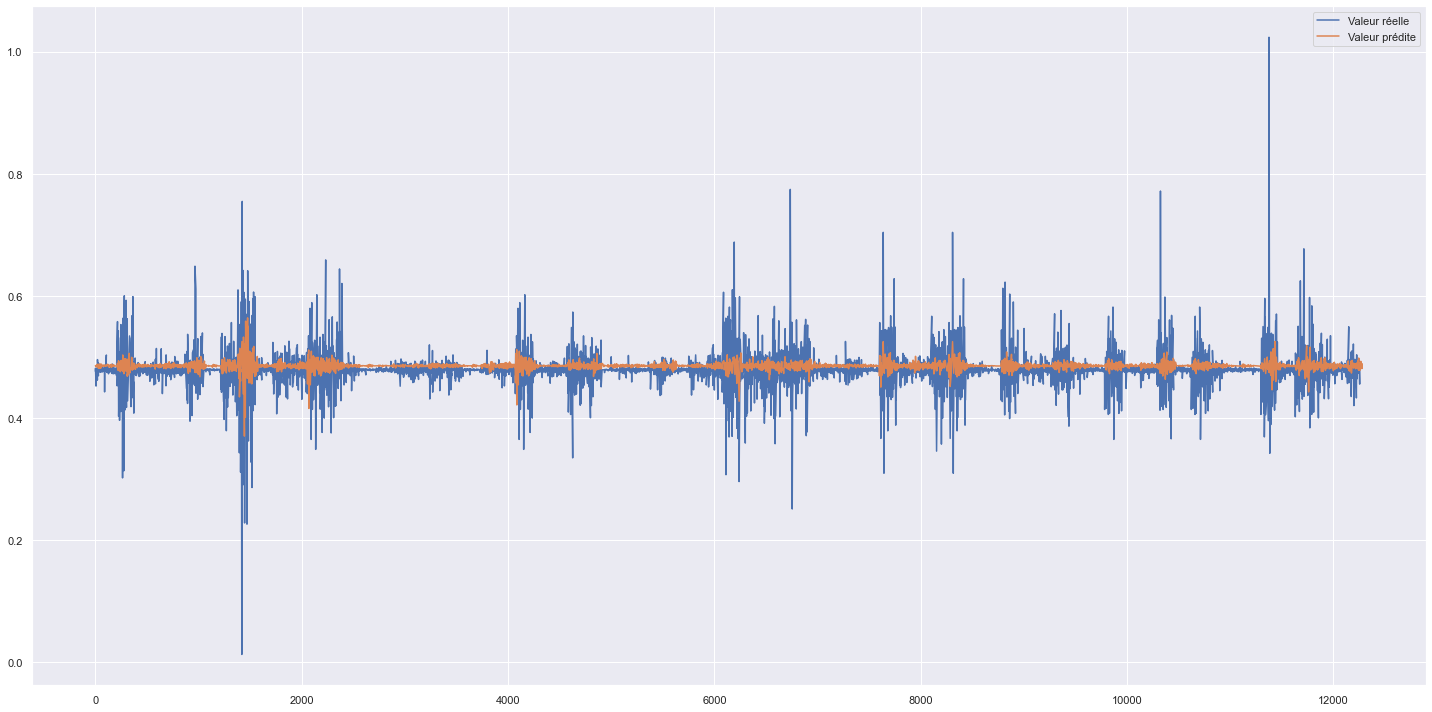

In [539]:
plt.plot(pd.DataFrame(Y_test), label = 'Valeur réelle')
plt.plot(pd.DataFrame(Y_test_predicted), label = 'Valeur prédite')
plt.legend()

## Rescale
 

In [39]:
#plt.plot(df_org.iloc[len(train_split)+24:].diff().shift(-24).dropna().reset_index()['Open'], label = '')
#plt.plot(Y_test_real_rescaled[:,-1], label = 'Real')
#plt.legend()

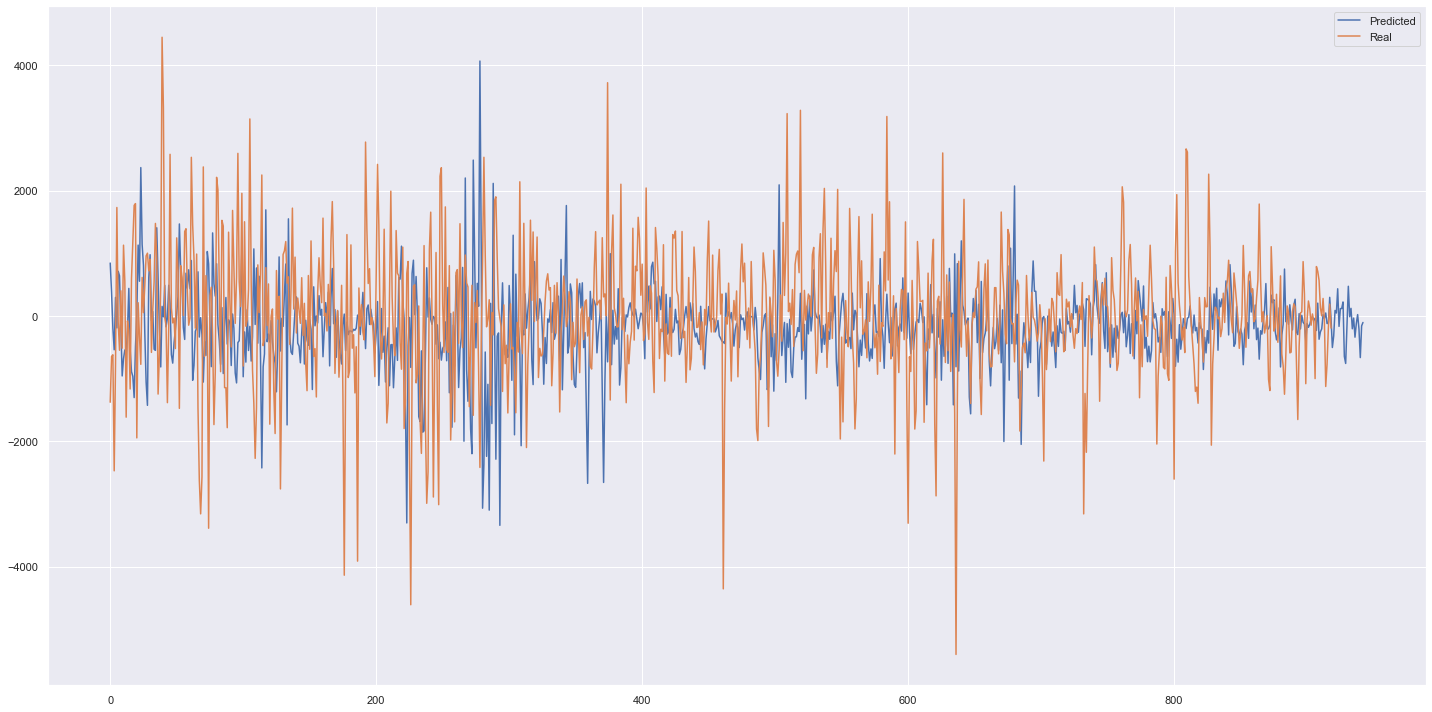

In [82]:
concat_predict = np.concatenate((X_test[:,0,:], Y_test_predicted),1)
concat_real = np.concatenate((X_test[:,0,:], Y_test.reshape(Y_test.shape[0],1)),1)
Y_test_predicted_rescaled = scaler_train.inverse_transform(concat_predict)
Y_test_real_rescaled = scaler_train.inverse_transform(concat_real)



plt.plot(Y_test_predicted_rescaled[:,-1], label = 'Predicted')
plt.plot(Y_test_real_rescaled[:,-1], label = 'Real')
plt.legend()

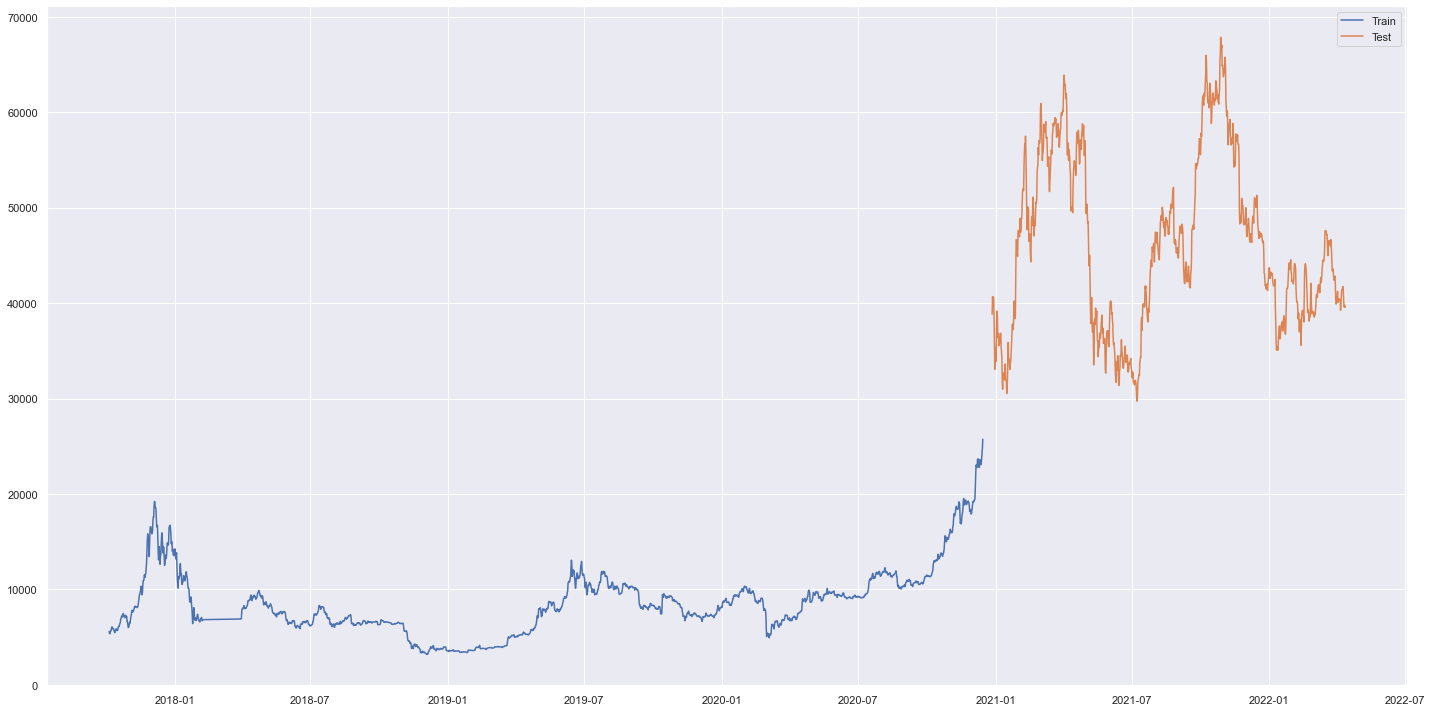

In [83]:
df_train_org =  df_org.iloc[:len(train_split)+1].shift(-24).dropna()['Open']
df_test_org =  df_org.iloc[len(train_split)+1:].shift(-24).dropna()['Open']

plt.plot(df_train_org, label = 'Train')
plt.plot(df_test_org, label = 'Test')
plt.legend()

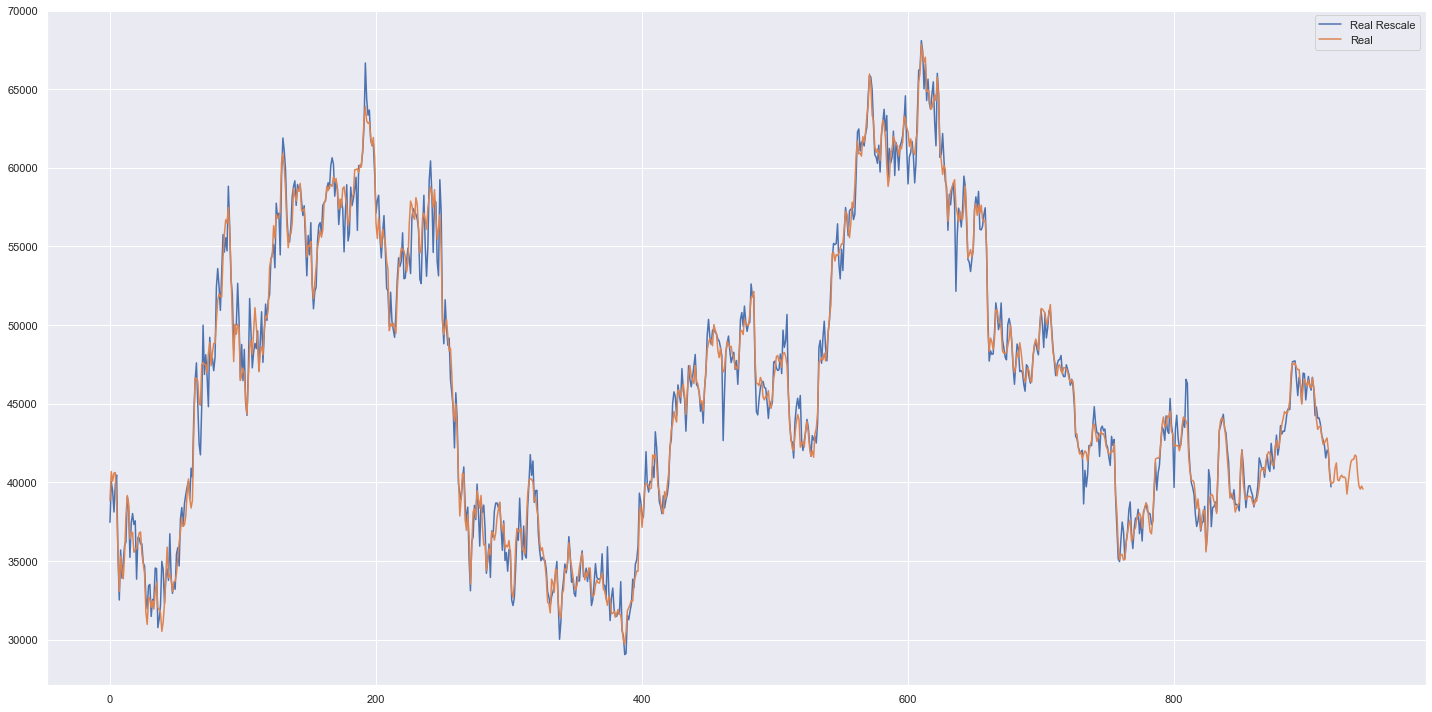

In [84]:
real_final_rescale = pd.DataFrame(Y_test_real_rescaled).iloc[:,-1]+df_test_org.reset_index()['Open']
predicted_final_rescale = pd.DataFrame(Y_test_predicted_rescaled).iloc[:,-1]+df_test_org.reset_index()['Open']
plt.plot(real_final_rescale, label = 'Real Rescale')
plt.plot(df_test_org.reset_index()['Open'], label = 'Real')
#plt.plot(predicted_final_rescale, label = 'Predicted Rescale')
plt.legend()

## Calculer l'erreur
- (1) Créer une dataframe avec valeur prédite et réelle
- (2) Drop na
- (2) Faire un calcul de MSE, RMSE, MAE

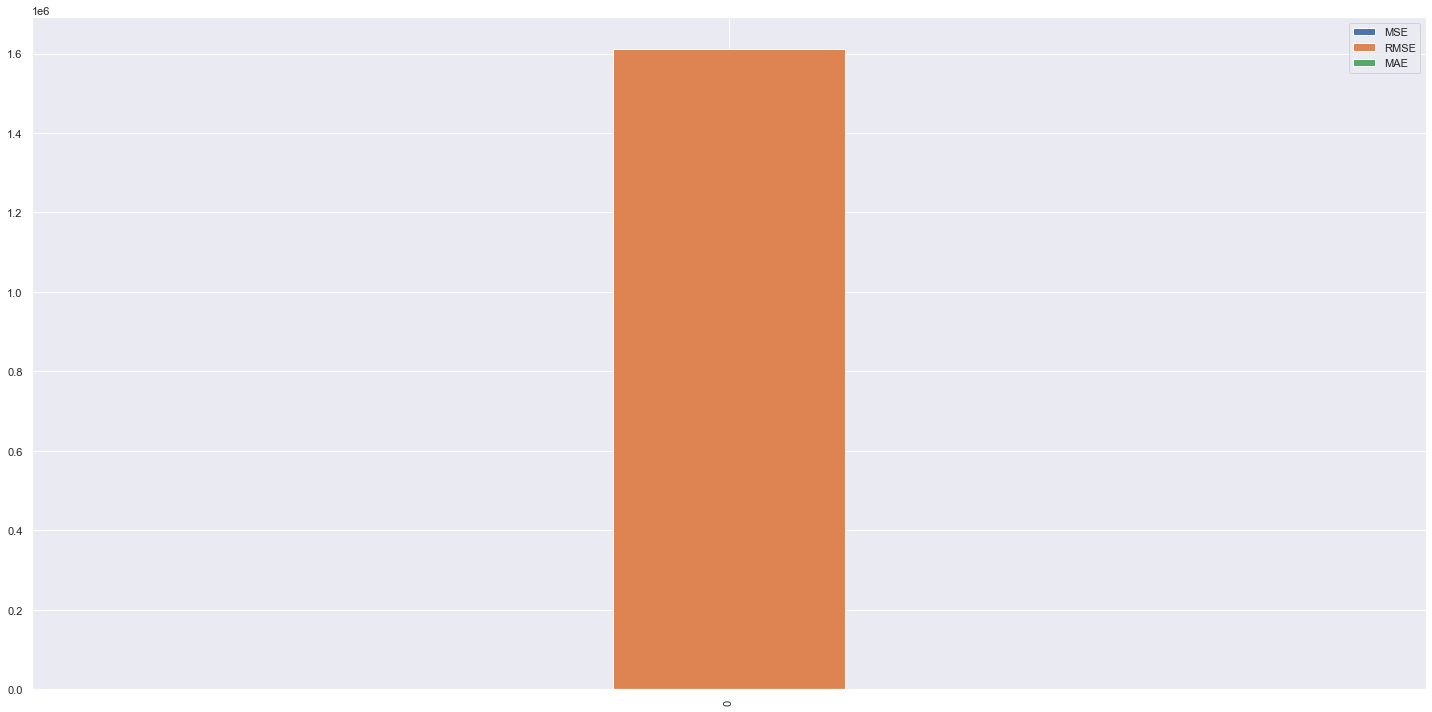

<AxesSubplot:>

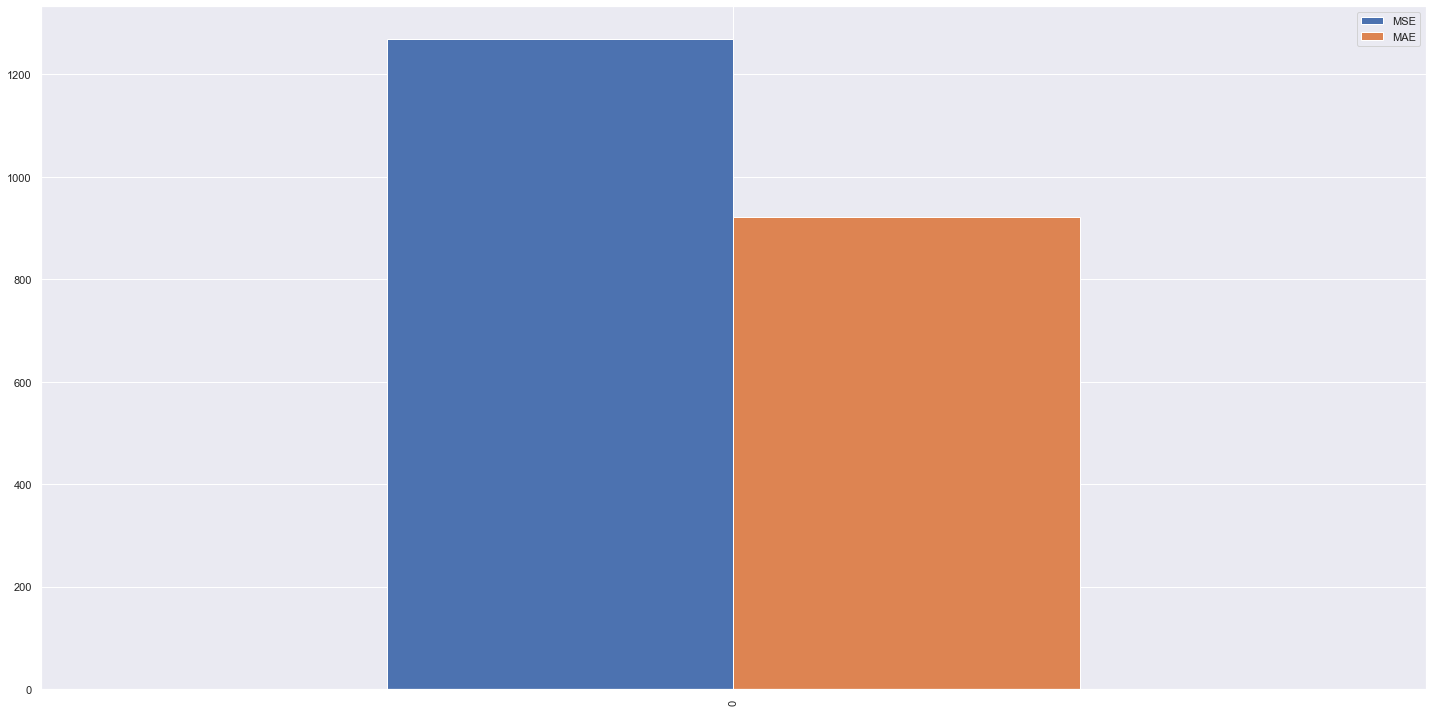

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def error(df_actual, df_predicted):
    mse = mean_squared_error(df_actual, df_predicted, squared=False)
    rmse  = mean_squared_error(df_actual, df_predicted, squared=True)
    mae =  mean_absolute_error(df_actual, df_predicted)
    return mse, rmse, mae


df_error = pd.concat([pd.DataFrame(Y_test_predicted_rescaled[:,-1]),
          pd.DataFrame(Y_test_real_rescaled[:,-1])],1)

df_error.columns = ["Predicted",'Real']
df_error = df_error.dropna()

errorS = pd.DataFrame(error(df_error['Real'], df_error['Predicted'])).T
errorS.columns=['MSE','RMSE','MAE']
errorS.plot.bar()
plt.show()
errorS[['MSE','MAE']].plot.bar()

## Calculer gain

In [86]:
nb_fois_meme_direction = (df_error<0)*1
nb_fois_meme_direction_2  = ((nb_fois_meme_direction['Predicted'] == nb_fois_meme_direction['Real'])*1).sum()
nb_fois_autre_direction = len(df_error)-nb_fois_meme_direction_2

print('nb_fois_meme_direction: ', nb_fois_meme_direction_2)
print('nb_fois_autre_direction: ', nb_fois_autre_direction)



nb_fois_meme_direction:  463
nb_fois_autre_direction:  456
